In [1]:
import pandas as pd 
import numpy as np 
import pyodbc 
import json


import warnings
warnings.filterwarnings("ignore")

In [2]:
conn_str = (
    'DRIVER={ODBC Driver 17 for SQL Server};'
    'SERVER=WIN-F444JI9S7GI;'
    'DATABASE=Finance;'
    'Trusted_Connection=yes;'
)


In [3]:
conn = pyodbc.connect(conn_str)

In [4]:
query = "SELECT * FROM dbo.cards_data"
cards = pd.read_sql(query, conn) 

In [5]:
query = "SELECT * FROM dbo.users_data"
users = pd.read_sql(query, conn)

In [6]:
query = "SELECT * FROM dbo.transactionss"
transactions=pd.read_sql(query, conn)

#Dtypes

In [7]:
cards

,id,client_id,card_brand,card_type,card_number,expires,cvv,has_chip,num_cards_issued,credit_limit,acct_open_date,year_pin_last_changed,card_on_dark_web
0,0,1362,Amex,Credit,393314135668401,04/2024,866,True,2,33900.0,01/1991,2014,No
1,1,550,Mastercard,Credit,5278231764792292,06/2024,396,True,1,11600.0,01/1994,2013,No
2,2,556,Mastercard,Debit,5889825928297675,09/2021,422,True,1,19948.0,01/1995,2011,No
3,3,1937,Visa,Credit,4289888672554714,04/2020,736,True,2,16400.0,01/1995,2015,No
4,4,1981,Mastercard,Debit,5433366978583845,03/2024,530,True,2,19439.0,01/1997,2007,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6141,6141,715,Mastercard,Debit,5369522792349411,08/2022,597,True,1,36570.0,12/2019,2019,No
6142,6142,1236,Mastercard,Debit,5791756986936871,11/2024,196,True,1,12223.0,12/2019,2019,No
6143,6143,253,Mastercard,Debit,5482273460029161,07/2024,79,False,1,24690.0,12/2019,2019,No
6144,6144,737,Mastercard,Credit,5413710543564908,10/2024,454,True,1,6600.0,12/2019,2019,No


In [8]:

cards.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6146 entries, 0 to 6145
Data columns (total 13 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     6146 non-null   int64  
 1   client_id              6146 non-null   int64  
 2   card_brand             6146 non-null   object 
 3   card_type              6146 non-null   object 
 4   card_number            6146 non-null   int64  
 5   expires                6146 non-null   object 
 6   cvv                    6146 non-null   int64  
 7   has_chip               6146 non-null   bool   
 8   num_cards_issued       6146 non-null   int64  
 9   credit_limit           6146 non-null   float64
 10  acct_open_date         6146 non-null   object 
 11  year_pin_last_changed  6146 non-null   int64  
 12  card_on_dark_web       6146 non-null   object 
dtypes: bool(1), float64(1), int64(6), object(5)
memory usage: 582.3+ KB


In [9]:
users

,id,current_age,retirement_age,birth_year,birth_month,gender,address,latitude,longitude,per_capita_income,yearly_income,total_debt,credit_score,num_credit_cards
0,0,33,69,1986,3,Male,858 Plum Avenue,43.590000,-70.330002,29237.0,59613.0,36199.0,763,4
1,1,43,74,1976,4,Female,113 Burns Lane,30.440001,-87.180000,22247.0,45360.0,14587.0,704,3
2,2,48,64,1971,8,Male,6035 Forest Avenue,40.840000,-73.870003,13461.0,27447.0,80850.0,673,5
3,3,49,65,1970,12,Male,840 Elm Avenue,33.889999,-98.510002,13705.0,27943.0,18693.0,681,4
4,4,54,72,1965,3,Female,6016 Little Creek Boulevard,47.610001,-122.300003,37485.0,76431.0,115362.0,716,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,1995,64,62,1955,7,Female,28 First Lane,39.919998,-77.709999,20943.0,39206.0,9219.0,605,4
1996,1996,46,66,1973,6,Female,7853 Grant Street,29.430000,-95.239998,21956.0,44768.0,59862.0,728,3
1997,1997,76,69,1943,8,Male,765 Forest Street,44.919998,-93.400002,39155.0,38800.0,25867.0,758,7
1998,1998,65,67,1954,9,Male,10 Third Avenue,37.560001,-122.370003,0.0,645.0,790.0,688,3


In [10]:
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 2000 non-null   int64  
 1   current_age        2000 non-null   int64  
 2   retirement_age     2000 non-null   int64  
 3   birth_year         2000 non-null   int64  
 4   birth_month        2000 non-null   int64  
 5   gender             2000 non-null   object 
 6   address            2000 non-null   object 
 7   latitude           2000 non-null   float64
 8   longitude          2000 non-null   float64
 9   per_capita_income  2000 non-null   float64
 10  yearly_income      2000 non-null   float64
 11  total_debt         2000 non-null   float64
 12  credit_score       2000 non-null   int64  
 13  num_credit_cards   2000 non-null   int64  
dtypes: float64(5), int64(7), object(2)
memory usage: 218.9+ KB


In [11]:
transactions

,id,date,client_id,card_id,amount,use_chip,merchant_id,merchant_city,merchant_state,zip,mcc,errors
0,7475327,2010-01-01 00:01:00,1556,2972,$-77.00,Swipe Transaction,59935,Beulah,ND,58523.0,5499,None
1,7475328,2010-01-01 00:02:00,561,4575,$14.57,Swipe Transaction,67570,Bettendorf,IA,52722.0,5311,None
2,7475329,2010-01-01 00:02:00,1129,102,$80.00,Swipe Transaction,27092,Vista,CA,92084.0,4829,None
3,7475331,2010-01-01 00:05:00,430,2860,$200.00,Swipe Transaction,27092,Crown Point,IN,46307.0,4829,None
4,7475332,2010-01-01 00:06:00,848,3915,$46.41,Swipe Transaction,13051,Harwood,MD,20776.0,5813,None
...,...,...,...,...,...,...,...,...,...,...,...,...
13305910,23761868,2019-10-31 23:56:00,1718,2379,$1.11,Chip Transaction,86438,West Covina,CA,91792.0,5499,None
13305911,23761869,2019-10-31 23:56:00,1766,2066,$12.80,Online Transaction,39261,ONLINE,None,None,5815,None
13305912,23761870,2019-10-31 23:57:00,199,1031,$40.44,Swipe Transaction,2925,Allen,TX,75002.0,4900,None
13305913,23761873,2019-10-31 23:58:00,1986,5443,$4.00,Chip Transaction,46284,Daly City,CA,94014.0,5411,None


In [12]:
transactions.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13305915 entries, 0 to 13305914
Data columns (total 12 columns):
 #   Column          Dtype         
---  ------          -----         
 0   id              int64         
 1   date            datetime64[ns]
 2   client_id       int64         
 3   card_id         int64         
 4   amount          object        
 5   use_chip        object        
 6   merchant_id     object        
 7   merchant_city   object        
 8   merchant_state  object        
 9   zip             object        
 10  mcc             int64         
 11  errors          object        
dtypes: datetime64[ns](1), int64(4), object(7)
memory usage: 1.2+ GB


In [13]:
#checking values

In [14]:
transactions["id"].max()
transactions["client_id"].max()
transactions["card_id"].max()
transactions["amount"].max()
transactions["merchant_id"].max()
transactions["mcc"].max()




np.int64(9402)

In [15]:
transactions["use_chip"].value_counts()

use_chip
Swipe Transaction     6967185
Chip Transaction      4780818
Online Transaction    1557912
Name: count, dtype: int64

#undercasting
#Please note that i kepy using GC collect to check memory useage to reduce it as much as  i can , it went from memory usage: 1.2+ GB to about 850.2+ MB
#only final code is visible to reduce the length of the file, but you get the idea

i know that i could predifine values, but this is based on the scenario where i dont know the actual data.

In [16]:
transactions['id'] = transactions['id'].astype(np.int32)
transactions['card_id'] = transactions['card_id'].astype(np.int16)
transactions["amount"]=transactions["amount"].str.replace('$', '', regex=False).astype(float)
transactions["zip"]=transactions["zip"].astype(float)
transactions["merchant_id"]=transactions["merchant_id"].astype("int32")
transactions['merchant_city'] = transactions['merchant_city'].astype('category')
transactions["merchant_state"]=transactions["merchant_state"].astype("string")
transactions["mcc"]=transactions["mcc"].astype("int16")
transactions["use_chip"]=transactions["use_chip"].astype("category")



In [17]:
transactions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13305915 entries, 0 to 13305914
Data columns (total 12 columns):
 #   Column          Dtype         
---  ------          -----         
 0   id              int32         
 1   date            datetime64[ns]
 2   client_id       int64         
 3   card_id         int16         
 4   amount          float64       
 5   use_chip        category      
 6   merchant_id     int32         
 7   merchant_city   category      
 8   merchant_state  string        
 9   zip             float64       
 10  mcc             int16         
 11  errors          object        
dtypes: category(2), datetime64[ns](1), float64(2), int16(2), int32(2), int64(1), object(1), string(1)
memory usage: 799.8+ MB


In [18]:
transactions

,id,date,client_id,card_id,amount,use_chip,merchant_id,merchant_city,merchant_state,zip,mcc,errors
0,7475327,2010-01-01 00:01:00,1556,2972,-77.00,Swipe Transaction,59935,Beulah,ND,58523.0,5499,None
1,7475328,2010-01-01 00:02:00,561,4575,14.57,Swipe Transaction,67570,Bettendorf,IA,52722.0,5311,None
2,7475329,2010-01-01 00:02:00,1129,102,80.00,Swipe Transaction,27092,Vista,CA,92084.0,4829,None
3,7475331,2010-01-01 00:05:00,430,2860,200.00,Swipe Transaction,27092,Crown Point,IN,46307.0,4829,None
4,7475332,2010-01-01 00:06:00,848,3915,46.41,Swipe Transaction,13051,Harwood,MD,20776.0,5813,None
...,...,...,...,...,...,...,...,...,...,...,...,...
13305910,23761868,2019-10-31 23:56:00,1718,2379,1.11,Chip Transaction,86438,West Covina,CA,91792.0,5499,None
13305911,23761869,2019-10-31 23:56:00,1766,2066,12.80,Online Transaction,39261,ONLINE,<NA>,NaN,5815,None
13305912,23761870,2019-10-31 23:57:00,199,1031,40.44,Swipe Transaction,2925,Allen,TX,75002.0,4900,None
13305913,23761873,2019-10-31 23:58:00,1986,5443,4.00,Chip Transaction,46284,Daly City,CA,94014.0,5411,None


In [19]:
import gc
gc.collect()
print(transactions.memory_usage(deep=True))



Index                   132
id                 53223660
date              106447320
client_id         106447320
card_id            26611830
amount            106447320
use_chip           13306221
merchant_id        53223660
merchant_city      27600204
merchant_state    686877637
zip               106447320
mcc                26611830
errors            328178741
dtype: int64


In [20]:
transactions["merchant_city"].value_counts()

merchant_city
ONLINE         1563700
Houston         146917
Miami            87388
Brooklyn         84020
Los Angeles      82004
                ...   
Yucca                1
Absarokee            1
Yutan                1
Zearing              1
Accomac              1
Name: count, Length: 12492, dtype: int64

In [21]:
transactions.isnull().sum()

id                       0
date                     0
client_id                0
card_id                  0
amount                   0
use_chip                 0
merchant_id              0
merchant_city            0
merchant_state     1563700
zip                1652706
mcc                      0
errors            13094522
dtype: int64

In [22]:
transactions["merchant_id"].isnull().sum()

np.int64(0)

#Adding merchant name as column based on mcc code2merchant

In [23]:
ID2Merchant= pd.read_json("mcc_codes.json", typ='series')


In [24]:
ID2Merchant=ID2Merchant.reset_index()

In [25]:
ID2Merchant.rename(columns={"index":"mcc",
                            0:"Merchant"},inplace=True)

In [26]:
transactions["merchant_id"].max()

np.int32(100342)

In [27]:
ID2Merchant

,mcc,Merchant
0,5812,Eating Places and Restaurants
1,5541,Service Stations
2,7996,"Amusement Parks, Carnivals, Circuses"
3,5411,"Grocery Stores, Supermarkets"
4,4784,Tolls and Bridge Fees
...,...,...
104,7549,Towing Services
105,5941,Sporting Goods Stores
106,5722,Household Appliance Stores
107,3009,Fabricated Structural Metal Products


In [28]:
transactions=pd.merge(transactions,ID2Merchant,on="mcc",how='left')

In [29]:
transactions

,id,date,client_id,card_id,amount,use_chip,merchant_id,merchant_city,merchant_state,zip,mcc,errors,Merchant
0,7475327,2010-01-01 00:01:00,1556,2972,-77.00,Swipe Transaction,59935,Beulah,ND,58523.0,5499,None,Miscellaneous Food Stores
1,7475328,2010-01-01 00:02:00,561,4575,14.57,Swipe Transaction,67570,Bettendorf,IA,52722.0,5311,None,Department Stores
2,7475329,2010-01-01 00:02:00,1129,102,80.00,Swipe Transaction,27092,Vista,CA,92084.0,4829,None,Money Transfer
3,7475331,2010-01-01 00:05:00,430,2860,200.00,Swipe Transaction,27092,Crown Point,IN,46307.0,4829,None,Money Transfer
4,7475332,2010-01-01 00:06:00,848,3915,46.41,Swipe Transaction,13051,Harwood,MD,20776.0,5813,None,Drinking Places (Alcoholic Beverages)
...,...,...,...,...,...,...,...,...,...,...,...,...,...
13305910,23761868,2019-10-31 23:56:00,1718,2379,1.11,Chip Transaction,86438,West Covina,CA,91792.0,5499,None,Miscellaneous Food Stores
13305911,23761869,2019-10-31 23:56:00,1766,2066,12.80,Online Transaction,39261,ONLINE,<NA>,NaN,5815,None,"Digital Goods - Media, Books, Apps"
13305912,23761870,2019-10-31 23:57:00,199,1031,40.44,Swipe Transaction,2925,Allen,TX,75002.0,4900,None,"Utilities - Electric, Gas, Water, Sanitary"
13305913,23761873,2019-10-31 23:58:00,1986,5443,4.00,Chip Transaction,46284,Daly City,CA,94014.0,5411,None,"Grocery Stores, Supermarkets"


In [30]:
transactions.rename(columns={"id":"transaction_id"},inplace=True)

#adding fraud label to detect farud behaviour for each tranasction #note that we dont have all labels for all tranasctions, so i changed null values to TBA , maybe we can implement some modelt to detech the rest?

In [31]:
fraud=pd.read_json("train_fraud_labels.json").reset_index()

In [32]:
fraud.rename(columns={"index":"transaction_id"},inplace=True)

In [33]:
fraud["target"].value_counts()

target
No     8901631
Yes      13332
Name: count, dtype: int64

In [34]:
fraud

,transaction_id,target
0,10649266,No
1,23410063,No
2,9316588,No
3,12478022,No
4,9558530,No
...,...,...
8914958,14064699,No
8914959,7676538,No
8914960,15131030,No
8914961,17244732,No


In [35]:
fraud.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8914963 entries, 0 to 8914962
Data columns (total 2 columns):
 #   Column          Dtype 
---  ------          ----- 
 0   transaction_id  int64 
 1   target          object
dtypes: int64(1), object(1)
memory usage: 136.0+ MB


In [36]:
transactions=pd.merge(transactions,fraud,on="transaction_id",how="left")

In [37]:
transactions.rename(columns={"target":"Fraud"},inplace=True)

In [38]:
transactions.rename(columns={"target":"fraud"},inplace=True)

In [39]:
transactions

,transaction_id,date,client_id,card_id,amount,use_chip,merchant_id,merchant_city,merchant_state,zip,mcc,errors,Merchant,Fraud
0,7475327,2010-01-01 00:01:00,1556,2972,-77.00,Swipe Transaction,59935,Beulah,ND,58523.0,5499,None,Miscellaneous Food Stores,No
1,7475328,2010-01-01 00:02:00,561,4575,14.57,Swipe Transaction,67570,Bettendorf,IA,52722.0,5311,None,Department Stores,No
2,7475329,2010-01-01 00:02:00,1129,102,80.00,Swipe Transaction,27092,Vista,CA,92084.0,4829,None,Money Transfer,No
3,7475331,2010-01-01 00:05:00,430,2860,200.00,Swipe Transaction,27092,Crown Point,IN,46307.0,4829,None,Money Transfer,NaN
4,7475332,2010-01-01 00:06:00,848,3915,46.41,Swipe Transaction,13051,Harwood,MD,20776.0,5813,None,Drinking Places (Alcoholic Beverages),No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13305910,23761868,2019-10-31 23:56:00,1718,2379,1.11,Chip Transaction,86438,West Covina,CA,91792.0,5499,None,Miscellaneous Food Stores,No
13305911,23761869,2019-10-31 23:56:00,1766,2066,12.80,Online Transaction,39261,ONLINE,<NA>,NaN,5815,None,"Digital Goods - Media, Books, Apps",No
13305912,23761870,2019-10-31 23:57:00,199,1031,40.44,Swipe Transaction,2925,Allen,TX,75002.0,4900,None,"Utilities - Electric, Gas, Water, Sanitary",No
13305913,23761873,2019-10-31 23:58:00,1986,5443,4.00,Chip Transaction,46284,Daly City,CA,94014.0,5411,None,"Grocery Stores, Supermarkets",NaN


In [40]:
transactions["Fraud"].value_counts()

Fraud
No     8901631
Yes      13332
Name: count, dtype: int64

In [41]:
transactions["Fraud"] = transactions["Fraud"].map({
    "Yes": True,
    "No": False
}).astype("boolean")

In [42]:
transactions["Fraud"].value_counts()

Fraud
False    8901631
True       13332
Name: count, dtype: Int64

In [43]:
users

,id,current_age,retirement_age,birth_year,birth_month,gender,address,latitude,longitude,per_capita_income,yearly_income,total_debt,credit_score,num_credit_cards
0,0,33,69,1986,3,Male,858 Plum Avenue,43.590000,-70.330002,29237.0,59613.0,36199.0,763,4
1,1,43,74,1976,4,Female,113 Burns Lane,30.440001,-87.180000,22247.0,45360.0,14587.0,704,3
2,2,48,64,1971,8,Male,6035 Forest Avenue,40.840000,-73.870003,13461.0,27447.0,80850.0,673,5
3,3,49,65,1970,12,Male,840 Elm Avenue,33.889999,-98.510002,13705.0,27943.0,18693.0,681,4
4,4,54,72,1965,3,Female,6016 Little Creek Boulevard,47.610001,-122.300003,37485.0,76431.0,115362.0,716,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,1995,64,62,1955,7,Female,28 First Lane,39.919998,-77.709999,20943.0,39206.0,9219.0,605,4
1996,1996,46,66,1973,6,Female,7853 Grant Street,29.430000,-95.239998,21956.0,44768.0,59862.0,728,3
1997,1997,76,69,1943,8,Male,765 Forest Street,44.919998,-93.400002,39155.0,38800.0,25867.0,758,7
1998,1998,65,67,1954,9,Male,10 Third Avenue,37.560001,-122.370003,0.0,645.0,790.0,688,3


#Making card_subset df, to merge needed columns  into our transactions data, # makes it easier for us to check behaviour and patterns

In [44]:
cards_subset=cards[["id","card_on_dark_web","card_brand","card_type","has_chip"]].rename(columns={"id":"card_id"})

In [45]:
cards_subset

,card_id,card_on_dark_web,card_brand,card_type,has_chip
0,0,No,Amex,Credit,True
1,1,No,Mastercard,Credit,True
2,2,No,Mastercard,Debit,True
3,3,No,Visa,Credit,True
4,4,No,Mastercard,Debit,True
...,...,...,...,...,...
6141,6141,No,Mastercard,Debit,True
6142,6142,No,Mastercard,Debit,True
6143,6143,No,Mastercard,Debit,False
6144,6144,No,Mastercard,Credit,True


In [46]:
transactions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13305915 entries, 0 to 13305914
Data columns (total 14 columns):
 #   Column          Dtype         
---  ------          -----         
 0   transaction_id  int32         
 1   date            datetime64[ns]
 2   client_id       int64         
 3   card_id         int16         
 4   amount          float64       
 5   use_chip        category      
 6   merchant_id     int32         
 7   merchant_city   category      
 8   merchant_state  string        
 9   zip             float64       
 10  mcc             int16         
 11  errors          object        
 12  Merchant        object        
 13  Fraud           boolean       
dtypes: boolean(1), category(2), datetime64[ns](1), float64(2), int16(2), int32(2), int64(1), object(2), string(1)
memory usage: 926.7+ MB


In [47]:
cards_subset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6146 entries, 0 to 6145
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   card_id           6146 non-null   int64 
 1   card_on_dark_web  6146 non-null   object
 2   card_brand        6146 non-null   object
 3   card_type         6146 non-null   object
 4   has_chip          6146 non-null   bool  
dtypes: bool(1), int64(1), object(3)
memory usage: 198.2+ KB


In [48]:
transactions=pd.merge(transactions,cards_subset,on="card_id",how="left")

In [49]:
#now lets remove it to free memory
del cards_subset

In [50]:
users

,id,current_age,retirement_age,birth_year,birth_month,gender,address,latitude,longitude,per_capita_income,yearly_income,total_debt,credit_score,num_credit_cards
0,0,33,69,1986,3,Male,858 Plum Avenue,43.590000,-70.330002,29237.0,59613.0,36199.0,763,4
1,1,43,74,1976,4,Female,113 Burns Lane,30.440001,-87.180000,22247.0,45360.0,14587.0,704,3
2,2,48,64,1971,8,Male,6035 Forest Avenue,40.840000,-73.870003,13461.0,27447.0,80850.0,673,5
3,3,49,65,1970,12,Male,840 Elm Avenue,33.889999,-98.510002,13705.0,27943.0,18693.0,681,4
4,4,54,72,1965,3,Female,6016 Little Creek Boulevard,47.610001,-122.300003,37485.0,76431.0,115362.0,716,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,1995,64,62,1955,7,Female,28 First Lane,39.919998,-77.709999,20943.0,39206.0,9219.0,605,4
1996,1996,46,66,1973,6,Female,7853 Grant Street,29.430000,-95.239998,21956.0,44768.0,59862.0,728,3
1997,1997,76,69,1943,8,Male,765 Forest Street,44.919998,-93.400002,39155.0,38800.0,25867.0,758,7
1998,1998,65,67,1954,9,Male,10 Third Avenue,37.560001,-122.370003,0.0,645.0,790.0,688,3


Creating columns for Y M D

In [51]:
transactions["year"]=transactions["date"].dt.year
transactions["month"]=transactions["date"].dt.month
transactions["day"]=transactions["date"].dt.day

In [52]:
cards

,id,client_id,card_brand,card_type,card_number,expires,cvv,has_chip,num_cards_issued,credit_limit,acct_open_date,year_pin_last_changed,card_on_dark_web
0,0,1362,Amex,Credit,393314135668401,04/2024,866,True,2,33900.0,01/1991,2014,No
1,1,550,Mastercard,Credit,5278231764792292,06/2024,396,True,1,11600.0,01/1994,2013,No
2,2,556,Mastercard,Debit,5889825928297675,09/2021,422,True,1,19948.0,01/1995,2011,No
3,3,1937,Visa,Credit,4289888672554714,04/2020,736,True,2,16400.0,01/1995,2015,No
4,4,1981,Mastercard,Debit,5433366978583845,03/2024,530,True,2,19439.0,01/1997,2007,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6141,6141,715,Mastercard,Debit,5369522792349411,08/2022,597,True,1,36570.0,12/2019,2019,No
6142,6142,1236,Mastercard,Debit,5791756986936871,11/2024,196,True,1,12223.0,12/2019,2019,No
6143,6143,253,Mastercard,Debit,5482273460029161,07/2024,79,False,1,24690.0,12/2019,2019,No
6144,6144,737,Mastercard,Credit,5413710543564908,10/2024,454,True,1,6600.0,12/2019,2019,No


In [53]:
cards["acct_open_date"] = pd.to_datetime(
    cards["acct_open_date"], 
    format="%m/%Y"
).dt.to_period("M")

cards["acct_open_year"]=cards["acct_open_date"].dt.year
cards["acct_open_month"]=cards["acct_open_date"].dt.month

In [54]:
transactions[transactions["merchant_state"].isnull()]["merchant_city"].value_counts()
##all tranmsactions that doesnt have a merchant_state code are online tranasctions.

merchant_city
ONLINE           1563700
Abita Springs          0
Yulee                  0
Ackworth               0
Zephyr Cove            0
                  ...   
Zeeland                0
Zeigler                0
Zelienople             0
Zellwood               0
Abington               0
Name: count, Length: 12492, dtype: int64

In [55]:
transactions.info

<bound method DataFrame.info of           transaction_id                date  client_id  card_id  amount  \
0                7475327 2010-01-01 00:01:00       1556     2972  -77.00   
1                7475328 2010-01-01 00:02:00        561     4575   14.57   
2                7475329 2010-01-01 00:02:00       1129      102   80.00   
3                7475331 2010-01-01 00:05:00        430     2860  200.00   
4                7475332 2010-01-01 00:06:00        848     3915   46.41   
...                  ...                 ...        ...      ...     ...   
13305910        23761868 2019-10-31 23:56:00       1718     2379    1.11   
13305911        23761869 2019-10-31 23:56:00       1766     2066   12.80   
13305912        23761870 2019-10-31 23:57:00        199     1031   40.44   
13305913        23761873 2019-10-31 23:58:00       1986     5443    4.00   
13305914        23761874 2019-10-31 23:59:00        489     5697   12.88   

                    use_chip  merchant_id merchant_city

In [56]:
gc.collect()

18

In [57]:
users

,id,current_age,retirement_age,birth_year,birth_month,gender,address,latitude,longitude,per_capita_income,yearly_income,total_debt,credit_score,num_credit_cards
0,0,33,69,1986,3,Male,858 Plum Avenue,43.590000,-70.330002,29237.0,59613.0,36199.0,763,4
1,1,43,74,1976,4,Female,113 Burns Lane,30.440001,-87.180000,22247.0,45360.0,14587.0,704,3
2,2,48,64,1971,8,Male,6035 Forest Avenue,40.840000,-73.870003,13461.0,27447.0,80850.0,673,5
3,3,49,65,1970,12,Male,840 Elm Avenue,33.889999,-98.510002,13705.0,27943.0,18693.0,681,4
4,4,54,72,1965,3,Female,6016 Little Creek Boulevard,47.610001,-122.300003,37485.0,76431.0,115362.0,716,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,1995,64,62,1955,7,Female,28 First Lane,39.919998,-77.709999,20943.0,39206.0,9219.0,605,4
1996,1996,46,66,1973,6,Female,7853 Grant Street,29.430000,-95.239998,21956.0,44768.0,59862.0,728,3
1997,1997,76,69,1943,8,Male,765 Forest Street,44.919998,-93.400002,39155.0,38800.0,25867.0,758,7
1998,1998,65,67,1954,9,Male,10 Third Avenue,37.560001,-122.370003,0.0,645.0,790.0,688,3


In [58]:
transactions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13305915 entries, 0 to 13305914
Data columns (total 21 columns):
 #   Column            Dtype         
---  ------            -----         
 0   transaction_id    int32         
 1   date              datetime64[ns]
 2   client_id         int64         
 3   card_id           int16         
 4   amount            float64       
 5   use_chip          category      
 6   merchant_id       int32         
 7   merchant_city     category      
 8   merchant_state    string        
 9   zip               float64       
 10  mcc               int16         
 11  errors            object        
 12  Merchant          object        
 13  Fraud             boolean       
 14  card_on_dark_web  object        
 15  card_brand        object        
 16  card_type         object        
 17  has_chip          bool          
 18  year              int32         
 19  month             int32         
 20  day               int32         
dtypes: boo

In [59]:
transactions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13305915 entries, 0 to 13305914
Data columns (total 21 columns):
 #   Column            Dtype         
---  ------            -----         
 0   transaction_id    int32         
 1   date              datetime64[ns]
 2   client_id         int64         
 3   card_id           int16         
 4   amount            float64       
 5   use_chip          category      
 6   merchant_id       int32         
 7   merchant_city     category      
 8   merchant_state    string        
 9   zip               float64       
 10  mcc               int16         
 11  errors            object        
 12  Merchant          object        
 13  Fraud             boolean       
 14  card_on_dark_web  object        
 15  card_brand        object        
 16  card_type         object        
 17  has_chip          bool          
 18  year              int32         
 19  month             int32         
 20  day               int32         
dtypes: boo

In [60]:
#lets fix values for  EVERYTHING WE ADDED to avoid any low performance
transactions["year"]=transactions["year"].astype("int16")
transactions["month"]=transactions["month"].astype("int8")
transactions["day"]=transactions["day"].astype("int8")

In [61]:
transactions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13305915 entries, 0 to 13305914
Data columns (total 21 columns):
 #   Column            Dtype         
---  ------            -----         
 0   transaction_id    int32         
 1   date              datetime64[ns]
 2   client_id         int64         
 3   card_id           int16         
 4   amount            float64       
 5   use_chip          category      
 6   merchant_id       int32         
 7   merchant_city     category      
 8   merchant_state    string        
 9   zip               float64       
 10  mcc               int16         
 11  errors            object        
 12  Merchant          object        
 13  Fraud             boolean       
 14  card_on_dark_web  object        
 15  card_brand        object        
 16  card_type         object        
 17  has_chip          bool          
 18  year              int16         
 19  month             int8          
 20  day               int8          
dtypes: boo

In [62]:
transactions["card_type"].value_counts()

card_type
Debit              8280996
Credit             4109189
Debit (Prepaid)     915730
Name: count, dtype: int64

In [63]:
transactions["card_brand"].value_counts()

card_brand
Mastercard    7157399
Visa          4957563
Amex           854490
Discover       336463
Name: count, dtype: int64

In [64]:
transactions["card_type"].value_counts()

card_type
Debit              8280996
Credit             4109189
Debit (Prepaid)     915730
Name: count, dtype: int64

In [65]:
transactions["card_type"]=transactions["card_type"].astype("category")
transactions["card_brand"]=transactions["card_brand"].astype("category")


In [66]:
users

,id,current_age,retirement_age,birth_year,birth_month,gender,address,latitude,longitude,per_capita_income,yearly_income,total_debt,credit_score,num_credit_cards
0,0,33,69,1986,3,Male,858 Plum Avenue,43.590000,-70.330002,29237.0,59613.0,36199.0,763,4
1,1,43,74,1976,4,Female,113 Burns Lane,30.440001,-87.180000,22247.0,45360.0,14587.0,704,3
2,2,48,64,1971,8,Male,6035 Forest Avenue,40.840000,-73.870003,13461.0,27447.0,80850.0,673,5
3,3,49,65,1970,12,Male,840 Elm Avenue,33.889999,-98.510002,13705.0,27943.0,18693.0,681,4
4,4,54,72,1965,3,Female,6016 Little Creek Boulevard,47.610001,-122.300003,37485.0,76431.0,115362.0,716,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,1995,64,62,1955,7,Female,28 First Lane,39.919998,-77.709999,20943.0,39206.0,9219.0,605,4
1996,1996,46,66,1973,6,Female,7853 Grant Street,29.430000,-95.239998,21956.0,44768.0,59862.0,728,3
1997,1997,76,69,1943,8,Male,765 Forest Street,44.919998,-93.400002,39155.0,38800.0,25867.0,758,7
1998,1998,65,67,1954,9,Male,10 Third Avenue,37.560001,-122.370003,0.0,645.0,790.0,688,3


In [67]:
users["geneder"]=users["gender"].astype("category")

In [68]:
users_subset=users[["gender","id"]]

In [69]:
users_subset.rename(columns={"id":"client_id"},inplace=True)

In [70]:
users_subset

,gender,client_id
0,Male,0
1,Female,1
2,Male,2
3,Male,3
4,Female,4
...,...,...
1995,Female,1995
1996,Female,1996
1997,Male,1997
1998,Male,1998


In [71]:
transactions=pd.merge(transactions,users_subset,on="client_id",how="left")


In [72]:
cards=pd.merge(cards,users_subset,on="client_id",how="left")

In [73]:
cards

,id,client_id,card_brand,card_type,card_number,expires,cvv,has_chip,num_cards_issued,credit_limit,acct_open_date,year_pin_last_changed,card_on_dark_web,acct_open_year,acct_open_month,gender
0,0,1362,Amex,Credit,393314135668401,04/2024,866,True,2,33900.0,1991-01,2014,No,1991,1,Male
1,1,550,Mastercard,Credit,5278231764792292,06/2024,396,True,1,11600.0,1994-01,2013,No,1994,1,Male
2,2,556,Mastercard,Debit,5889825928297675,09/2021,422,True,1,19948.0,1995-01,2011,No,1995,1,Male
3,3,1937,Visa,Credit,4289888672554714,04/2020,736,True,2,16400.0,1995-01,2015,No,1995,1,Female
4,4,1981,Mastercard,Debit,5433366978583845,03/2024,530,True,2,19439.0,1997-01,2007,No,1997,1,Male
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6141,6141,715,Mastercard,Debit,5369522792349411,08/2022,597,True,1,36570.0,2019-12,2019,No,2019,12,Female
6142,6142,1236,Mastercard,Debit,5791756986936871,11/2024,196,True,1,12223.0,2019-12,2019,No,2019,12,Female
6143,6143,253,Mastercard,Debit,5482273460029161,07/2024,79,False,1,24690.0,2019-12,2019,No,2019,12,Male
6144,6144,737,Mastercard,Credit,5413710543564908,10/2024,454,True,1,6600.0,2019-12,2019,No,2019,12,Female


In [74]:
transactions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13305915 entries, 0 to 13305914
Data columns (total 22 columns):
 #   Column            Dtype         
---  ------            -----         
 0   transaction_id    int32         
 1   date              datetime64[ns]
 2   client_id         int64         
 3   card_id           int16         
 4   amount            float64       
 5   use_chip          category      
 6   merchant_id       int32         
 7   merchant_city     category      
 8   merchant_state    string        
 9   zip               float64       
 10  mcc               int16         
 11  errors            object        
 12  Merchant          object        
 13  Fraud             boolean       
 14  card_on_dark_web  object        
 15  card_brand        category      
 16  card_type         category      
 17  has_chip          bool          
 18  year              int16         
 19  month             int8          
 20  day               int8          
 21  gender

In [75]:
transactions["card_on_dark_web"]=transactions["card_on_dark_web"].astype("string")

####################
making sure that credits cards count both debit/Credit card

In [76]:
cards[cards["client_id"]==2]

,id,client_id,card_brand,card_type,card_number,expires,cvv,has_chip,num_cards_issued,credit_limit,acct_open_date,year_pin_last_changed,card_on_dark_web,acct_open_year,acct_open_month,gender
2576,2576,2,Mastercard,Debit,5077942665919872,08/2023,127,False,2,9669.0,2008-04,2011,No,2008,4,Male
2919,2919,2,Visa,Credit,4809764397537147,12/2013,939,True,1,7800.0,2006-05,2012,No,2006,5,Male
3298,3298,2,Mastercard,Credit,5191615123045322,11/2020,485,True,1,7400.0,2005-06,2011,No,2005,6,Male
3593,3593,2,Mastercard,Debit,5458954548704072,07/2024,47,True,1,9001.0,2015-06,2015,No,2015,6,Male
6073,6073,2,Mastercard,Debit,5617443939610345,08/2024,813,True,2,16491.0,2012-12,2012,No,2012,12,Male


In [77]:
users[users["id"]==2]

,id,current_age,retirement_age,birth_year,birth_month,gender,address,latitude,longitude,per_capita_income,yearly_income,total_debt,credit_score,num_credit_cards,geneder
2,2,48,64,1971,8,Male,6035 Forest Avenue,40.84,-73.870003,13461.0,27447.0,80850.0,673,5,Male


In [78]:
cards[cards["client_id"]==14]

,id,client_id,card_brand,card_type,card_number,expires,cvv,has_chip,num_cards_issued,credit_limit,acct_open_date,year_pin_last_changed,card_on_dark_web,acct_open_year,acct_open_month,gender
2076,2076,14,Amex,Credit,336131482851954,12/2022,979,True,2,14100.0,2005-03,2008,No,2005,3,Female
2164,2164,14,Visa,Debit,4610833826779556,04/2018,523,True,2,3899.0,2007-03,2008,No,2007,3,Female
3082,3082,14,Visa,Debit,4124567693793737,04/2022,870,False,1,16464.0,2010-05,2012,No,2010,5,Female
4106,4106,14,Visa,Credit,4493101815036488,06/2024,137,True,1,5400.0,2001-08,2008,No,2001,8,Female
5159,5159,14,Mastercard,Debit (Prepaid),5644525290796847,05/2020,601,True,1,22.0,2009-10,2010,No,2009,10,Female


In [79]:
users[users["id"]==14]

,id,current_age,retirement_age,birth_year,birth_month,gender,address,latitude,longitude,per_capita_income,yearly_income,total_debt,credit_score,num_credit_cards,geneder
14,14,79,57,1940,12,Female,2487 Martin Luther King Drive,21.389999,-158.009995,21314.0,32232.0,21134.0,652,5,Female


In [80]:
cards[cards["client_id"]==715]

,id,client_id,card_brand,card_type,card_number,expires,cvv,has_chip,num_cards_issued,credit_limit,acct_open_date,year_pin_last_changed,card_on_dark_web,acct_open_year,acct_open_month,gender
1574,1574,715,Mastercard,Debit,5098630896285808,04/2023,18,True,2,65185.0,2020-02,2020,No,2020,2,Female
6141,6141,715,Mastercard,Debit,5369522792349411,08/2022,597,True,1,36570.0,2019-12,2019,No,2019,12,Female


And yes, we can confirm that 

########################

In [81]:
import geopy

In [82]:
users

,id,current_age,retirement_age,birth_year,birth_month,gender,address,latitude,longitude,per_capita_income,yearly_income,total_debt,credit_score,num_credit_cards,geneder
0,0,33,69,1986,3,Male,858 Plum Avenue,43.590000,-70.330002,29237.0,59613.0,36199.0,763,4,Male
1,1,43,74,1976,4,Female,113 Burns Lane,30.440001,-87.180000,22247.0,45360.0,14587.0,704,3,Female
2,2,48,64,1971,8,Male,6035 Forest Avenue,40.840000,-73.870003,13461.0,27447.0,80850.0,673,5,Male
3,3,49,65,1970,12,Male,840 Elm Avenue,33.889999,-98.510002,13705.0,27943.0,18693.0,681,4,Male
4,4,54,72,1965,3,Female,6016 Little Creek Boulevard,47.610001,-122.300003,37485.0,76431.0,115362.0,716,5,Female
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,1995,64,62,1955,7,Female,28 First Lane,39.919998,-77.709999,20943.0,39206.0,9219.0,605,4,Female
1996,1996,46,66,1973,6,Female,7853 Grant Street,29.430000,-95.239998,21956.0,44768.0,59862.0,728,3,Female
1997,1997,76,69,1943,8,Male,765 Forest Street,44.919998,-93.400002,39155.0,38800.0,25867.0,758,7,Male
1998,1998,65,67,1954,9,Male,10 Third Avenue,37.560001,-122.370003,0.0,645.0,790.0,688,3,Male


In [83]:
cards.card_on_dark_web.value_counts()
#No cards on darkweb

card_on_dark_web
No    6146
Name: count, dtype: int64

In [84]:
#refernce data

In [ ]:
from IPython.display import clear_output
import seaborn as sns

In [92]:
transactions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13305915 entries, 0 to 13305914
Data columns (total 22 columns):
 #   Column            Dtype         
---  ------            -----         
 0   transaction_id    int32         
 1   date              datetime64[ns]
 2   client_id         int64         
 3   card_id           int16         
 4   amount            float64       
 5   use_chip          category      
 6   merchant_id       int32         
 7   merchant_city     category      
 8   merchant_state    string        
 9   zip               float64       
 10  mcc               int16         
 11  errors            object        
 12  Merchant          object        
 13  Fraud             boolean       
 14  card_on_dark_web  string        
 15  card_brand        category      
 16  card_type         category      
 17  has_chip          bool          
 18  year              int16         
 19  month             int8          
 20  day               int8          
 21  gender

In [93]:
transactions["gender"]=transactions["gender"].astype("category")

In [94]:
users

,id,current_age,retirement_age,birth_year,birth_month,gender,address,latitude,longitude,per_capita_income,yearly_income,total_debt,credit_score,num_credit_cards,geneder
0,0,33,69,1986,3,Male,858 Plum Avenue,43.590000,-70.330002,29237.0,59613.0,36199.0,763,4,Male
1,1,43,74,1976,4,Female,113 Burns Lane,30.440001,-87.180000,22247.0,45360.0,14587.0,704,3,Female
2,2,48,64,1971,8,Male,6035 Forest Avenue,40.840000,-73.870003,13461.0,27447.0,80850.0,673,5,Male
3,3,49,65,1970,12,Male,840 Elm Avenue,33.889999,-98.510002,13705.0,27943.0,18693.0,681,4,Male
4,4,54,72,1965,3,Female,6016 Little Creek Boulevard,47.610001,-122.300003,37485.0,76431.0,115362.0,716,5,Female
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,1995,64,62,1955,7,Female,28 First Lane,39.919998,-77.709999,20943.0,39206.0,9219.0,605,4,Female
1996,1996,46,66,1973,6,Female,7853 Grant Street,29.430000,-95.239998,21956.0,44768.0,59862.0,728,3,Female
1997,1997,76,69,1943,8,Male,765 Forest Street,44.919998,-93.400002,39155.0,38800.0,25867.0,758,7,Male
1998,1998,65,67,1954,9,Male,10 Third Avenue,37.560001,-122.370003,0.0,645.0,790.0,688,3,Male


<Axes: xlabel='current_age', ylabel='credit_score'>

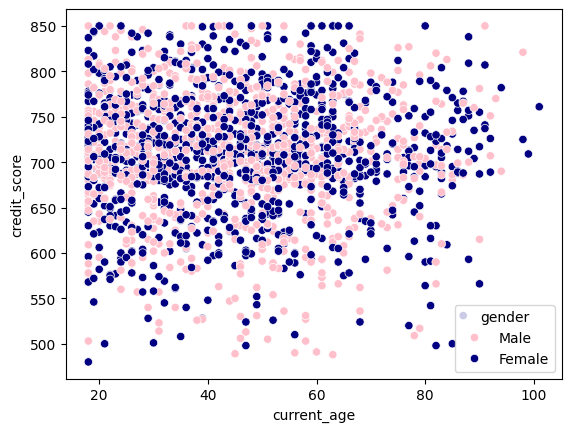

In [95]:
sns.scatterplot(data=users,x="current_age",y="credit_score",hue="gender",palette=["pink","navy"])

In [96]:
#maybe we can get locations?
!pip install reverse_geocoder

In [97]:
import reverse_geocoder as rg

coords = list(zip(users['latitude'], users['longitude']))
results = rg.search(coords)


Loading formatted geocoded file...


In [98]:
results



[{'lat': '43.57814',
  'lon': '-70.32172',
  'name': 'Scarborough',
  'admin1': 'Maine',
  'admin2': 'Cumberland County',
  'cc': 'US'},
 {'lat': '30.42881',
  'lon': '-87.17997',
  'name': 'East Pensacola Heights',
  'admin1': 'Florida',
  'admin2': 'Escambia County',
  'cc': 'US'},
 {'lat': '40.84985',
  'lon': '-73.86641',
  'name': 'The Bronx',
  'admin1': 'New York',
  'admin2': 'Bronx',
  'cc': 'US'},
 {'lat': '33.91371',
  'lon': '-98.49339',
  'name': 'Wichita Falls',
  'admin1': 'Texas',
  'admin2': 'Wichita County',
  'cc': 'US'},
 {'lat': '47.60621',
  'lon': '-122.33207',
  'name': 'Seattle',
  'admin1': 'Washington',
  'admin2': 'King County',
  'cc': 'US'},
 {'lat': '42.96173',
  'lon': '-77.13998',
  'name': 'Clifton Springs',
  'admin1': 'New York',
  'admin2': 'Ontario County',
  'cc': 'US'},
 {'lat': '32.96282',
  'lon': '-117.03586',
  'name': 'Poway',
  'admin1': 'California',
  'admin2': 'San Diego County',
  'cc': 'US'},
 {'lat': '39.29038',
  'lon': '-76.61219',


In [99]:
users["city"]=[i.get("admin1")for i in results]

In [100]:
users

,id,current_age,retirement_age,birth_year,birth_month,gender,address,latitude,longitude,per_capita_income,yearly_income,total_debt,credit_score,num_credit_cards,geneder,city
0,0,33,69,1986,3,Male,858 Plum Avenue,43.590000,-70.330002,29237.0,59613.0,36199.0,763,4,Male,Maine
1,1,43,74,1976,4,Female,113 Burns Lane,30.440001,-87.180000,22247.0,45360.0,14587.0,704,3,Female,Florida
2,2,48,64,1971,8,Male,6035 Forest Avenue,40.840000,-73.870003,13461.0,27447.0,80850.0,673,5,Male,New York
3,3,49,65,1970,12,Male,840 Elm Avenue,33.889999,-98.510002,13705.0,27943.0,18693.0,681,4,Male,Texas
4,4,54,72,1965,3,Female,6016 Little Creek Boulevard,47.610001,-122.300003,37485.0,76431.0,115362.0,716,5,Female,Washington
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,1995,64,62,1955,7,Female,28 First Lane,39.919998,-77.709999,20943.0,39206.0,9219.0,605,4,Female,Pennsylvania
1996,1996,46,66,1973,6,Female,7853 Grant Street,29.430000,-95.239998,21956.0,44768.0,59862.0,728,3,Female,Texas
1997,1997,76,69,1943,8,Male,765 Forest Street,44.919998,-93.400002,39155.0,38800.0,25867.0,758,7,Male,Minnesota
1998,1998,65,67,1954,9,Male,10 Third Avenue,37.560001,-122.370003,0.0,645.0,790.0,688,3,Male,California


In [101]:
users

,id,current_age,retirement_age,birth_year,birth_month,gender,address,latitude,longitude,per_capita_income,yearly_income,total_debt,credit_score,num_credit_cards,geneder,city
0,0,33,69,1986,3,Male,858 Plum Avenue,43.590000,-70.330002,29237.0,59613.0,36199.0,763,4,Male,Maine
1,1,43,74,1976,4,Female,113 Burns Lane,30.440001,-87.180000,22247.0,45360.0,14587.0,704,3,Female,Florida
2,2,48,64,1971,8,Male,6035 Forest Avenue,40.840000,-73.870003,13461.0,27447.0,80850.0,673,5,Male,New York
3,3,49,65,1970,12,Male,840 Elm Avenue,33.889999,-98.510002,13705.0,27943.0,18693.0,681,4,Male,Texas
4,4,54,72,1965,3,Female,6016 Little Creek Boulevard,47.610001,-122.300003,37485.0,76431.0,115362.0,716,5,Female,Washington
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,1995,64,62,1955,7,Female,28 First Lane,39.919998,-77.709999,20943.0,39206.0,9219.0,605,4,Female,Pennsylvania
1996,1996,46,66,1973,6,Female,7853 Grant Street,29.430000,-95.239998,21956.0,44768.0,59862.0,728,3,Female,Texas
1997,1997,76,69,1943,8,Male,765 Forest Street,44.919998,-93.400002,39155.0,38800.0,25867.0,758,7,Male,Minnesota
1998,1998,65,67,1954,9,Male,10 Third Avenue,37.560001,-122.370003,0.0,645.0,790.0,688,3,Male,California


In [102]:
users.describe()

,id,current_age,retirement_age,birth_year,birth_month,latitude,longitude,per_capita_income,yearly_income,total_debt,credit_score,num_credit_cards
count,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,999.500000,45.391500,66.237500,1973.803000,6.439000,37.389225,-91.554765,23141.928000,45715.882000,63709.694000,709.734500,3.073000
std,577.494589,18.414092,3.628867,18.421234,3.565338,5.114324,16.283293,11324.137358,22992.615456,52254.453421,67.221949,1.637379
min,0.000000,18.000000,50.000000,1918.000000,1.000000,20.879999,-159.410004,0.000000,1.000000,0.000000,480.000000,1.000000
25%,499.750000,30.000000,65.000000,1961.000000,3.000000,33.837501,-97.395000,16824.500000,32818.500000,23986.750000,681.000000,2.000000
50%,999.500000,44.000000,66.000000,1975.000000,7.000000,38.250000,-86.440002,20581.000000,40744.500000,58251.000000,711.500000,3.000000
75%,1499.250000,58.000000,68.000000,1989.000000,10.000000,41.200001,-80.129997,26286.000000,52698.500000,89070.500000,753.000000,4.000000
max,1999.000000,101.000000,79.000000,2002.000000,12.000000,61.200001,-68.669998,163145.000000,307018.000000,516263.000000,850.000000,9.000000


In [103]:
#Now as we have all nesccary information to study transactions , we can go ahead and see if wee can find any patterns

In [104]:
pd.set_option('display.float_format', '{:.2f}'.format)


In [105]:
transactions.describe(include=np.number)

,transaction_id,client_id,card_id,amount,merchant_id,zip,mcc,year,month,day
count,13305915.00,13305915.00,13305915.00,13305915.00,13305915.00,11653209.00,13305915.00,13305915.00,13305915.00,13305915.00
mean,15584024.57,1026.81,3475.27,42.98,47723.76,51327.82,5565.44,2014.52,6.45,15.72
std,4704498.65,581.64,1674.36,81.66,25815.34,29404.23,875.70,2.81,3.41,8.80
min,7475327.00,0.00,0.00,-500.00,1.00,1001.00,1711.00,2010.00,1.00,1.00
25%,11506044.50,519.00,2413.00,8.93,25887.00,28602.00,5300.00,2012.00,4.00,8.00
50%,15570866.00,1070.00,3584.00,28.99,45926.00,47670.00,5499.00,2015.00,6.00,16.00
75%,19653605.50,1531.00,4901.00,63.71,67570.00,77901.00,5812.00,2017.00,9.00,23.00
max,23761874.00,1998.00,6144.00,6820.20,100342.00,99928.00,9402.00,2019.00,12.00,31.00


In [106]:
transactions["transaction_type"]=transactions["amount"].apply(lambda x:"in" if x<0 else "out")

In [107]:
#will take out errors to analyize completed tranasctions.
errors=transactions[~transactions["errors"].isna()]
transactions=transactions[transactions["errors"].isna()]

EDA (finally) will exclude fraud tranasctions(average user behaviour)

In [108]:
#libraries
import seaborn as sns
import plotly as plt
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter


In [109]:
transactions["Merchant"]=transactions["Merchant"].astype("category")

In [110]:
gc.collect()

166

In [111]:
genders=users["gender"].value_counts().reset_index()

In [112]:
genders

,gender,count
0,Female,1016
1,Male,984


In [113]:
#axes 1
gender_transactions=transactions[transactions["Fraud"]==False].groupby("gender").size().reset_index()
gender_transactions.rename(columns={0:"count"},inplace=True)
gender_transactions

,gender,count
0,Female,4488807
1,Male,4271626


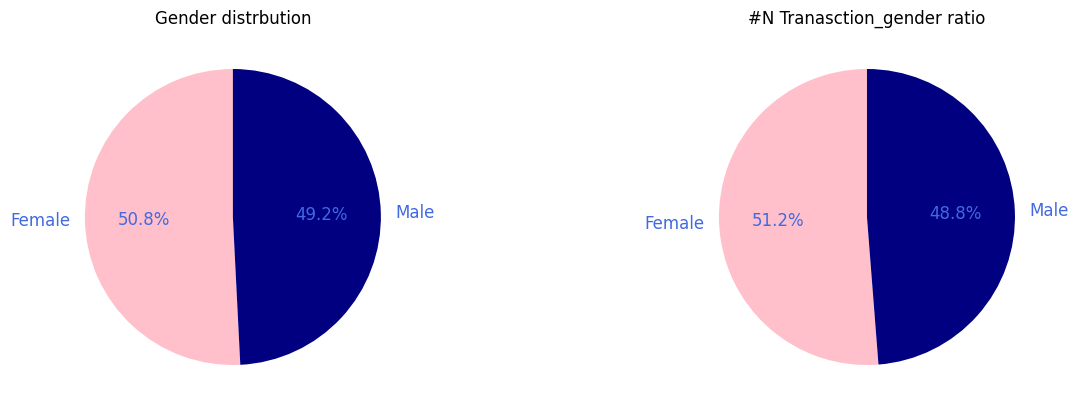

In [114]:
#axes 0
#what is the distrubution of our users? and what geneder make more tranaactions?
fig,axes=plt.subplots(1,2,figsize=(15,5))
axes[0].pie(genders["count"],labels=genders["gender"],colors=["pink","navy"],startangle=90,textprops={"fontsize":12,'color': 'royalblue'},autopct='%1.1f%%')
axes[0].set_title("Gender distrbution")
axes[1].pie(gender_transactions["count"],labels=genders["gender"],colors=["pink","navy"],startangle=90,textprops={"fontsize":12,'color': 'royalblue'},autopct='%1.1f%%')
axes[1].set_title("#N Tranasction_gender ratio")
plt.subplots_adjust(top=0.85)


In [115]:
#axes2
amount_spent_per_gender=transactions[transactions["Fraud"]==False].groupby("gender")["amount"].sum().reset_index()
amount_spent_per_gender

,gender,amount
0,Female,191404361.60
1,Male,181578534.63


Text(0.5, 1.0, '#amount spent (no fraud)')

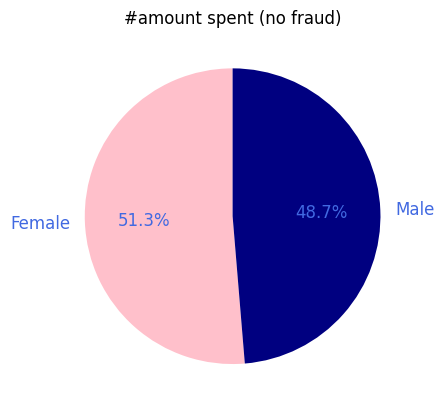

In [116]:
plt.pie(amount_spent_per_gender["amount"],labels=amount_spent_per_gender["gender"],colors=["pink","navy"],startangle=90,textprops={"fontsize":12,'color': 'royalblue'},autopct='%1.1f%%')
plt.title("#amount spent (no fraud)")

In [117]:
gender_card=cards.groupby(["gender","card_type"]).size().reset_index()
gender_card

,gender,card_type,0
0,Female,Credit,1043
1,Female,Debit,1814
2,Female,Debit (Prepaid),282
3,Male,Credit,1014
4,Male,Debit,1697
5,Male,Debit (Prepaid),296


Text(0.5, 0.98, 'income-           debt-         creditscore')

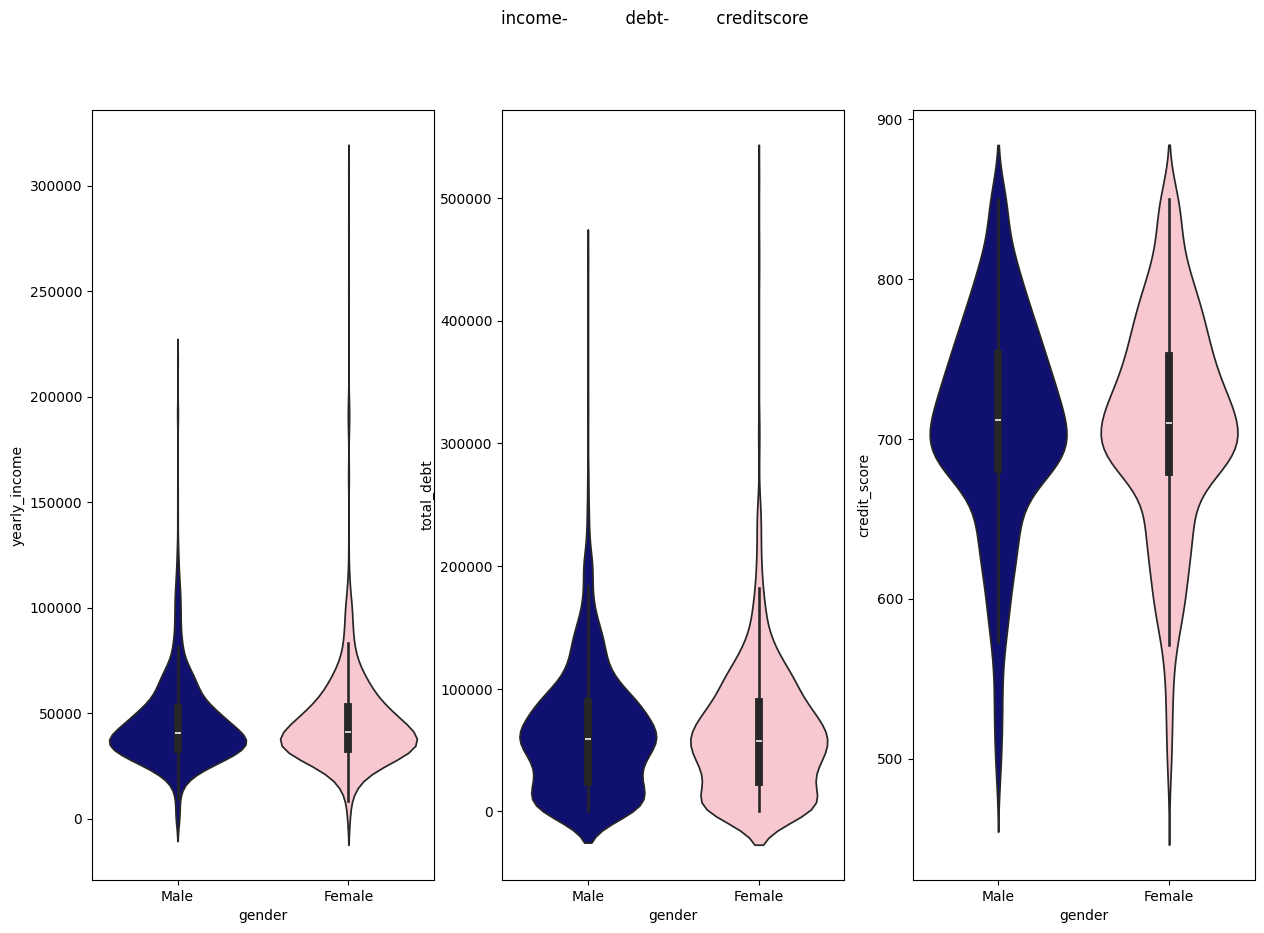

In [118]:
#income vs debt vs credit score per gender.
fig,axes1= plt.subplots(1,3,figsize=(15,10))
sns.violinplot(data=users,x="gender",y="yearly_income",hue="gender",palette=["navy","pink"], ax=axes1[0])
sns.violinplot(data=users,x="gender",y="total_debt",hue="gender",palette=["navy","pink"], ax=axes1[1])
sns.violinplot(data=users,x="gender",y="credit_score",hue="gender",palette=["navy","pink"], ax=axes1[2])
plt.suptitle("income-           debt-         creditscore")

<Axes: ylabel='total_debt'>

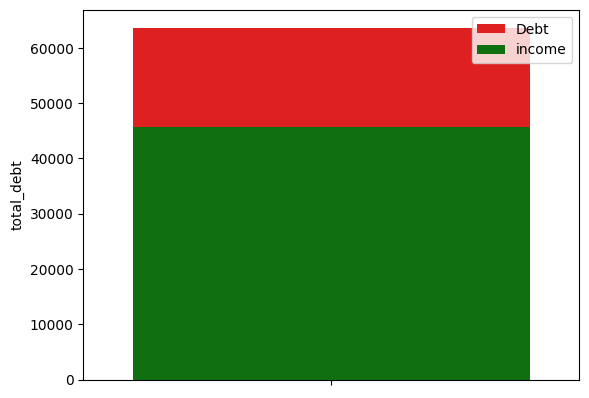

In [119]:
sns.barplot(data=users,y=users["total_debt"],ci=False,color="red",label="Debt")
sns.barplot(data=users,y=users["yearly_income"],ci=False,color="green",label="income")


In [120]:
users[users["yearly_income"]>52698].sort_values(by="yearly_income",ascending=False)

,id,current_age,retirement_age,birth_year,birth_month,gender,address,latitude,longitude,per_capita_income,yearly_income,total_debt,credit_score,num_credit_cards,geneder,city
1325,1325,23,66,1996,3,Female,459 East Avenue,37.44,-122.20,150583.00,307018.00,516263.00,745,2,Female,California
1156,1156,56,69,1963,6,Female,9603 South Lane,40.74,-74.33,137428.00,280199.00,91367.00,752,5,Female,New Jersey
708,708,63,63,1957,1,Female,3 Madison Street,40.71,-73.99,163145.00,249925.00,202328.00,722,4,Female,New York
777,777,18,65,2002,1,Male,970 Essex Drive,37.37,-122.21,106305.00,216740.00,0.00,700,2,Male,California
1014,1014,54,70,1965,9,Female,393 Mountain View Lane,33.60,-117.82,96516.00,196784.00,437533.00,729,3,Female,California
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1500,1500,53,66,1967,1,Male,270 Plum Street,38.44,-121.30,25949.00,52904.00,144534.00,680,4,Male,California
1583,1583,38,68,1981,10,Male,182 Valley Street,40.04,-76.30,25917.00,52844.00,0.00,826,3,Male,Pennsylvania
506,506,56,68,1964,1,Male,2742 El Camino Boulevard,42.71,-78.93,25916.00,52841.00,36288.00,733,5,Male,New York
1252,1252,23,70,1996,7,Female,473 El Camino Street,33.86,-118.33,25900.00,52815.00,77064.00,658,2,Female,California


In [121]:
quantiledebt=users["total_debt"].quantile(0.85)

In [122]:
users["total_debt"].describe()
def debt_category(x):
    if x < 32818.50:
        return "low_debt"
    elif  32819< x < 52698.50:
        return "mid_debt"
    elif 52698< x < quantiledebt:
       return "high_debt"
    elif quantileincome < x :
       return "very high debt"


In [123]:
users["yearly_income"].describe()



count     2000.00
mean     45715.88
std      22992.62
min          1.00
25%      32818.50
50%      40744.50
75%      52698.50
max     307018.00
Name: yearly_income, dtype: float64

In [124]:
quantileincome=users["yearly_income"].quantile(0.85)

In [125]:
quantileincome

np.float64(62031.59999999999)

In [126]:
def income_category(x):
    if x < 32820:
        return "low_income"
    elif  32819< x < 40744.50:
        return "mid_income"
    elif 40744< x < quantileincome:
       return "high_income"
    elif quantileincome < x :
       return "very high income"


In [127]:
users["debt_group"]=users["yearly_income"].apply(lambda x:debt_category(x))

In [128]:
users["income_group"]=users["yearly_income"].apply(lambda x:income_category(x))

In [129]:
users

,id,current_age,retirement_age,birth_year,birth_month,gender,address,latitude,longitude,per_capita_income,yearly_income,total_debt,credit_score,num_credit_cards,geneder,city,debt_group,income_group
0,0,33,69,1986,3,Male,858 Plum Avenue,43.59,-70.33,29237.00,59613.00,36199.00,763,4,Male,Maine,high_debt,high_income
1,1,43,74,1976,4,Female,113 Burns Lane,30.44,-87.18,22247.00,45360.00,14587.00,704,3,Female,Florida,mid_debt,high_income
2,2,48,64,1971,8,Male,6035 Forest Avenue,40.84,-73.87,13461.00,27447.00,80850.00,673,5,Male,New York,low_debt,low_income
3,3,49,65,1970,12,Male,840 Elm Avenue,33.89,-98.51,13705.00,27943.00,18693.00,681,4,Male,Texas,low_debt,low_income
4,4,54,72,1965,3,Female,6016 Little Creek Boulevard,47.61,-122.30,37485.00,76431.00,115362.00,716,5,Female,Washington,high_debt,very high income
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,1995,64,62,1955,7,Female,28 First Lane,39.92,-77.71,20943.00,39206.00,9219.00,605,4,Female,Pennsylvania,mid_debt,mid_income
1996,1996,46,66,1973,6,Female,7853 Grant Street,29.43,-95.24,21956.00,44768.00,59862.00,728,3,Female,Texas,mid_debt,high_income
1997,1997,76,69,1943,8,Male,765 Forest Street,44.92,-93.40,39155.00,38800.00,25867.00,758,7,Male,Minnesota,mid_debt,mid_income
1998,1998,65,67,1954,9,Male,10 Third Avenue,37.56,-122.37,0.00,645.00,790.00,688,3,Male,California,low_debt,low_income


In [130]:
users["income_group"]=users["income_group"].astype("category")
users["debt_group"]=users["debt_group"].astype("category")

In [131]:
users

,id,current_age,retirement_age,birth_year,birth_month,gender,address,latitude,longitude,per_capita_income,yearly_income,total_debt,credit_score,num_credit_cards,geneder,city,debt_group,income_group
0,0,33,69,1986,3,Male,858 Plum Avenue,43.59,-70.33,29237.00,59613.00,36199.00,763,4,Male,Maine,high_debt,high_income
1,1,43,74,1976,4,Female,113 Burns Lane,30.44,-87.18,22247.00,45360.00,14587.00,704,3,Female,Florida,mid_debt,high_income
2,2,48,64,1971,8,Male,6035 Forest Avenue,40.84,-73.87,13461.00,27447.00,80850.00,673,5,Male,New York,low_debt,low_income
3,3,49,65,1970,12,Male,840 Elm Avenue,33.89,-98.51,13705.00,27943.00,18693.00,681,4,Male,Texas,low_debt,low_income
4,4,54,72,1965,3,Female,6016 Little Creek Boulevard,47.61,-122.30,37485.00,76431.00,115362.00,716,5,Female,Washington,high_debt,very high income
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,1995,64,62,1955,7,Female,28 First Lane,39.92,-77.71,20943.00,39206.00,9219.00,605,4,Female,Pennsylvania,mid_debt,mid_income
1996,1996,46,66,1973,6,Female,7853 Grant Street,29.43,-95.24,21956.00,44768.00,59862.00,728,3,Female,Texas,mid_debt,high_income
1997,1997,76,69,1943,8,Male,765 Forest Street,44.92,-93.40,39155.00,38800.00,25867.00,758,7,Male,Minnesota,mid_debt,mid_income
1998,1998,65,67,1954,9,Male,10 Third Avenue,37.56,-122.37,0.00,645.00,790.00,688,3,Male,California,low_debt,low_income


<Axes: xlabel='income_group', ylabel='count'>

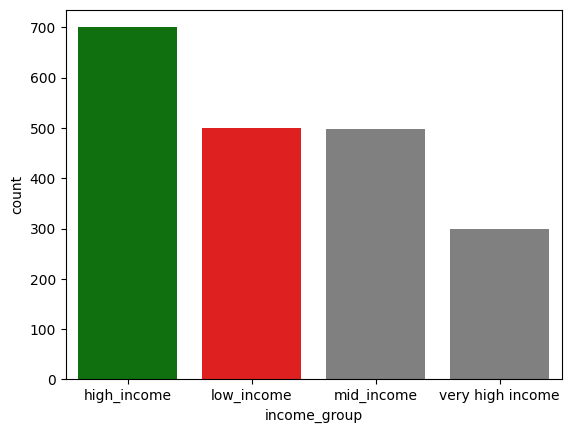

In [132]:
#groups
sns.countplot(
    data=users,
    x="income_group",
    palette={
        "low_income": "red",
        "mid_income": "grey",
        "high_income": "green",
        "very high income": "grey"
    }
)

<Axes: xlabel='debt_group', ylabel='count'>

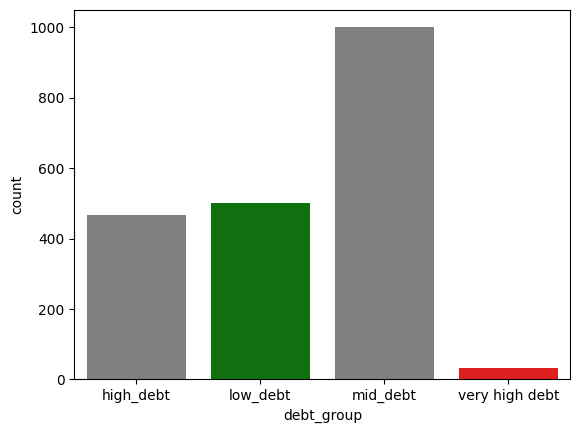

In [133]:
sns.countplot(
    data=users,
    x="debt_group",
    palette={
        "low_debt": "green",
        "mid_debt": "grey",
        "high_debt": "grey",
        "very high debt": "red"
    }
)

<Axes: xlabel='income_group', ylabel='Count'>

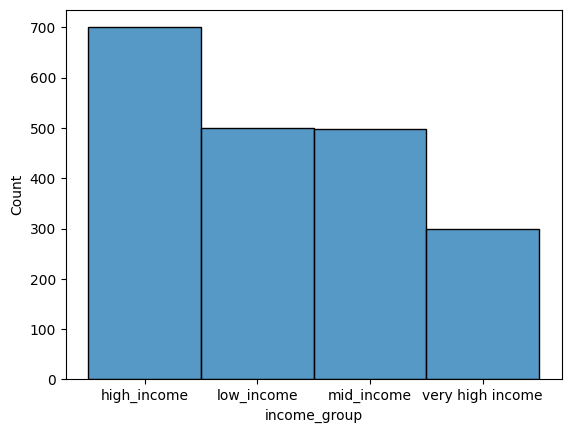

In [135]:
sns.histplot(data=users,x="income_group")

In [136]:
#where do they reside

In [137]:
users[users["income_group"]=="high_income"]["city"].value_counts()

city
California          86
New York            50
Florida             43
Texas               39
Pennsylvania        32
Illinois            31
Ohio                27
Washington          22
Maryland            20
Georgia             19
New Jersey          19
Michigan            19
Virginia            18
North Carolina      18
Massachusetts       18
Indiana             17
Tennessee           16
Wisconsin           14
Colorado            13
Minnesota           13
Arizona             13
Connecticut         12
Iowa                12
Alabama             11
Kentucky            11
Missouri            11
Kansas              10
Louisiana            9
New Hampshire        9
Oregon               8
Maine                7
Rhode Island         6
Hawaii               5
Nevada               5
South Carolina       5
North Dakota         4
Arkansas             3
Oklahoma             3
West Virginia        3
Utah                 3
Montana              2
Mississippi          2
Wyoming              2
Nebras

In [138]:
users[users["income_group"]=="low_income"]["city"].value_counts()

city
California         72
Texas              60
Florida            39
New York           25
North Carolina     24
Georgia            22
Illinois           22
Ohio               18
Tennessee          16
Michigan           16
Kentucky           15
South Carolina     15
Mississippi        13
Oklahoma           12
Indiana            12
Alabama            11
New Mexico         11
Pennsylvania       10
Arkansas            9
Arizona             7
Virginia            6
Utah                6
Wisconsin           6
New Jersey          6
Missouri            6
Iowa                5
Louisiana           5
Nebraska            4
Colorado            4
Massachusetts       3
Washington          3
Idaho               3
Maryland            2
Minnesota           2
South Dakota        2
Oregon              2
Hawaii              1
Delaware            1
Connecticut         1
Kansas              1
West Virginia       1
New Hampshire       1
Baja California     1
Name: count, dtype: int64

In [139]:
users[users["income_group"]=="mid_income"]["city"].value_counts()

city
California        45
Florida           39
Ohio              32
North Carolina    31
Texas             30
Pennsylvania      26
Illinois          23
New York          22
Michigan          18
Louisiana         15
Tennessee         15
Indiana           15
Georgia           13
Wisconsin         12
Missouri          11
Alabama           10
Oklahoma          10
Kentucky           9
South Carolina     9
Oregon             9
Iowa               9
New Jersey         7
Arizona            7
Washington         7
Virginia           6
West Virginia      6
Arkansas           6
Nevada             5
Minnesota          5
Vermont            4
Montana            4
Hawaii             4
Kansas             4
Delaware           3
South Dakota       3
Mississippi        3
New Hampshire      3
Maryland           3
Nebraska           3
Idaho              3
Utah               2
Colorado           2
New Mexico         2
North Dakota       1
Rhode Island       1
Massachusetts      1
Connecticut        1
Name: co

In [140]:
users[users["income_group"]=="very high income"]["city"].value_counts()

city
California        40
Texas             29
New York          28
New Jersey        22
Massachusetts     18
Pennsylvania      16
Maryland          14
Virginia          14
Washington        12
Illinois          11
Georgia           11
Florida           10
Connecticut        8
Michigan           7
Arizona            6
North Carolina     5
Ohio               5
Minnesota          5
Colorado           4
Tennessee          4
Indiana            4
Oklahoma           3
Nevada             3
Oregon             3
Kansas             3
Wisconsin          2
Delaware           2
Louisiana          2
Kentucky           1
New Hampshire      1
Nebraska           1
South Carolina     1
Arkansas           1
Alabama            1
Utah               1
Rhode Island       1
Missouri           1
Name: count, dtype: int64

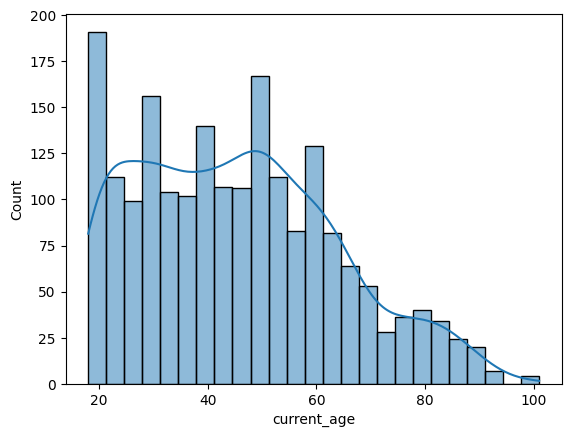

In [141]:
#user age distrbution
sns.histplot(data=users,x="current_age",bins=25,kde=True)
users["age_group"] = pd.qcut(users["current_age"], q=10)


Text(0.5, 1.0, 'income distrubutio to age')

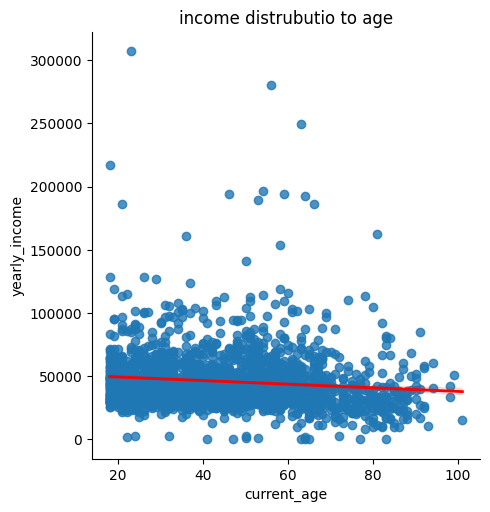

In [142]:
### is there is a relation between age, and yearly income?
sns.lmplot(data=users,x="current_age",y="yearly_income",line_kws={"color": "red", "lw": 2})
plt.title("income distrubutio to age")

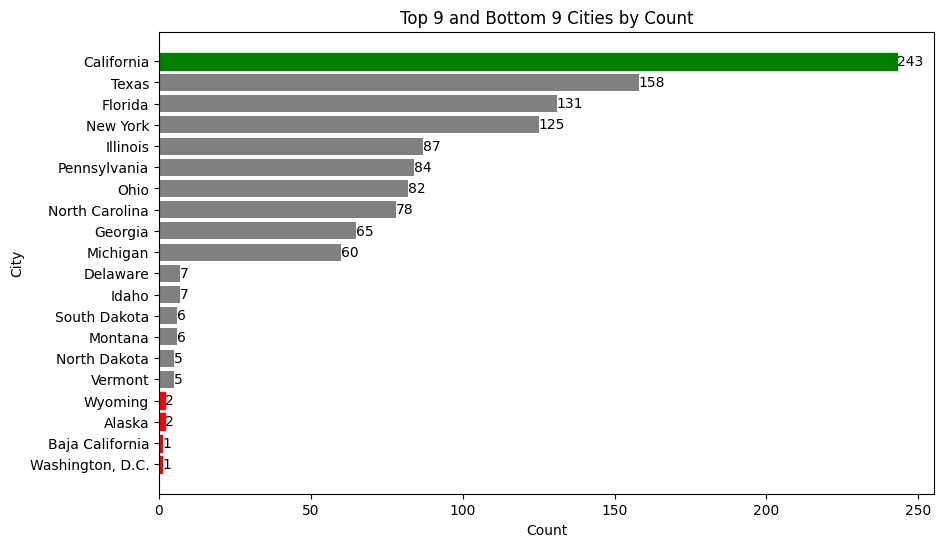

In [143]:
##where are most of users?
cities_count=users["city"].value_counts().reset_index()
top_users_distr=cities_count.head(10)
bottom_users_distr=cities_count.tail(10)
combined=[[top_users_distr,top_users_distr]]
combined = pd.concat([top_users_distr, bottom_users_distr])
combined =combined.sort_values(by="count",ascending=True)
# Plot
plt.figure(figsize=(10,6))
top10=plt.barh(y=combined['city'], width=combined['count'],color="grey")
plt.title('Top 9 and Bottom 9 Cities by Count')
plt.xlabel('Count')
plt.ylabel('City')
top10[-1].set_color("green")
top10[0].set_color("red")
top10[1].set_color("red")
top10[2].set_color("red")
top10[3].set_color("red")





plt.bar_label(top10)
plt.show()

In [144]:
cords_mapes=pd.DataFrame(coords,users["city"]).reset_index()
cords_mapes.rename(columns={0:"latitude",1:"longitude"},inplace=True)

In [145]:
combined = pd.concat([top_users_distr, bottom_users_distr])


In [146]:
bottom_users_distr

,city,count
42,Delaware,7
43,Idaho,7
44,South Dakota,6
45,Montana,6
46,North Dakota,5
47,Vermont,5
48,Alaska,2
49,Wyoming,2
50,"Washington, D.C.",1
51,Baja California,1


In [147]:
cards_issue_peryear=cards["acct_open_year"].value_counts().reset_index()


In [148]:
#Cards

In [149]:
cards

,id,client_id,card_brand,card_type,card_number,expires,cvv,has_chip,num_cards_issued,credit_limit,acct_open_date,year_pin_last_changed,card_on_dark_web,acct_open_year,acct_open_month,gender
0,0,1362,Amex,Credit,393314135668401,04/2024,866,True,2,33900.00,1991-01,2014,No,1991,1,Male
1,1,550,Mastercard,Credit,5278231764792292,06/2024,396,True,1,11600.00,1994-01,2013,No,1994,1,Male
2,2,556,Mastercard,Debit,5889825928297675,09/2021,422,True,1,19948.00,1995-01,2011,No,1995,1,Male
3,3,1937,Visa,Credit,4289888672554714,04/2020,736,True,2,16400.00,1995-01,2015,No,1995,1,Female
4,4,1981,Mastercard,Debit,5433366978583845,03/2024,530,True,2,19439.00,1997-01,2007,No,1997,1,Male
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6141,6141,715,Mastercard,Debit,5369522792349411,08/2022,597,True,1,36570.00,2019-12,2019,No,2019,12,Female
6142,6142,1236,Mastercard,Debit,5791756986936871,11/2024,196,True,1,12223.00,2019-12,2019,No,2019,12,Female
6143,6143,253,Mastercard,Debit,5482273460029161,07/2024,79,False,1,24690.00,2019-12,2019,No,2019,12,Male
6144,6144,737,Mastercard,Credit,5413710543564908,10/2024,454,True,1,6600.00,2019-12,2019,No,2019,12,Female


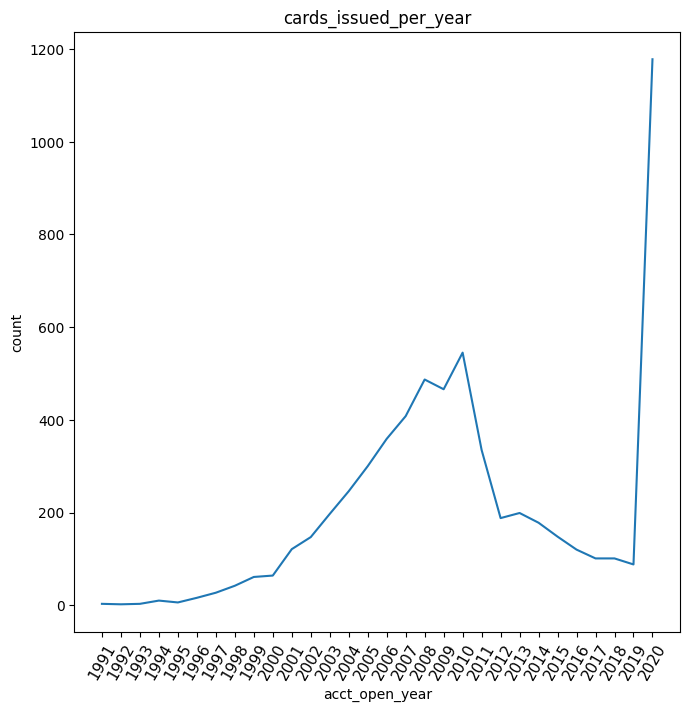

In [150]:
# when did we get most of our users?
plt.figure(figsize=(7, 7)) 
sns.lineplot(x="acct_open_year", y="count", data=cards_issue_peryear)
plt.xticks(cards_issue_peryear["acct_open_year"].unique(), rotation=60,fontsize=11)
plt.tight_layout()
plt.title("cards_issued_per_year")
plt.show()


In [151]:
#what happened in 2020? 

In [152]:
data_2020=cards[cards["acct_open_date"].dt.year >2019]
data_2020

,id,client_id,card_brand,card_type,card_number,expires,cvv,has_chip,num_cards_issued,credit_limit,acct_open_date,year_pin_last_changed,card_on_dark_web,acct_open_year,acct_open_month,gender
387,387,811,Amex,Credit,399966116933253,01/2024,343,True,1,24400.00,2020-01,2020,No,2020,1,Female
388,388,1134,Amex,Credit,324640473359364,03/2024,659,True,2,7200.00,2020-01,2020,No,2020,1,Female
389,389,749,Amex,Credit,363305614201313,09/2023,943,False,1,5600.00,2020-01,2020,No,2020,1,Male
390,390,1301,Amex,Credit,308100975355379,04/2024,881,True,1,19000.00,2020-01,2020,No,2020,1,Female
391,391,66,Amex,Credit,306900138857551,06/2020,741,True,1,14300.00,2020-01,2020,No,2020,1,Female
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1997,1997,1339,Visa,Credit,4990026739935404,09/2022,28,True,1,16700.00,2020-02,2020,No,2020,2,Male
1998,1998,971,Visa,Debit,4014221108776885,03/2020,718,True,2,10971.00,2020-02,2020,No,2020,2,Female
1999,1999,1627,Visa,Debit,4340019142427236,10/2021,130,True,2,10099.00,2020-02,2020,No,2020,2,Male
2000,2000,1735,Visa,Credit,4865108019055527,07/2021,237,True,1,15100.00,2020-02,2020,No,2020,2,Male


In [153]:
transactions

,transaction_id,date,client_id,card_id,amount,use_chip,merchant_id,merchant_city,merchant_state,zip,...,Fraud,card_on_dark_web,card_brand,card_type,has_chip,year,month,day,gender,transaction_type
0,7475327,2010-01-01 00:01:00,1556,2972,-77.00,Swipe Transaction,59935,Beulah,ND,58523.00,...,False,No,Mastercard,Debit (Prepaid),True,2010,1,1,Female,in
1,7475328,2010-01-01 00:02:00,561,4575,14.57,Swipe Transaction,67570,Bettendorf,IA,52722.00,...,False,No,Mastercard,Credit,True,2010,1,1,Male,out
2,7475329,2010-01-01 00:02:00,1129,102,80.00,Swipe Transaction,27092,Vista,CA,92084.00,...,False,No,Mastercard,Debit,True,2010,1,1,Male,out
3,7475331,2010-01-01 00:05:00,430,2860,200.00,Swipe Transaction,27092,Crown Point,IN,46307.00,...,<NA>,No,Mastercard,Debit,False,2010,1,1,Female,out
4,7475332,2010-01-01 00:06:00,848,3915,46.41,Swipe Transaction,13051,Harwood,MD,20776.00,...,False,No,Visa,Debit,True,2010,1,1,Male,out
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13305910,23761868,2019-10-31 23:56:00,1718,2379,1.11,Chip Transaction,86438,West Covina,CA,91792.00,...,False,No,Mastercard,Debit,True,2019,10,31,Female,out
13305911,23761869,2019-10-31 23:56:00,1766,2066,12.80,Online Transaction,39261,ONLINE,<NA>,NaN,...,False,No,Mastercard,Debit,True,2019,10,31,Male,out
13305912,23761870,2019-10-31 23:57:00,199,1031,40.44,Swipe Transaction,2925,Allen,TX,75002.00,...,False,No,Mastercard,Debit,True,2019,10,31,Female,out
13305913,23761873,2019-10-31 23:58:00,1986,5443,4.00,Chip Transaction,46284,Daly City,CA,94014.00,...,<NA>,No,Visa,Debit,True,2019,10,31,Female,out


In [154]:
monthes_in_25=cards[cards["acct_open_date"].dt.year >2019]["acct_open_month"].value_counts()
monthes_in_25

acct_open_month
2    607
1    571
Name: count, dtype: int64

In [155]:
data_2020["card_type"].value_counts()

card_type
Debit              646
Credit             402
Debit (Prepaid)    130
Name: count, dtype: int64

In [156]:
data_2020["gender"].value_counts()

gender
Male      592
Female    586
Name: count, dtype: int64

In [157]:
cards[cards["client_id"]==1362]
# each cards is a sepereate account

,id,client_id,card_brand,card_type,card_number,expires,cvv,has_chip,num_cards_issued,credit_limit,acct_open_date,year_pin_last_changed,card_on_dark_web,acct_open_year,acct_open_month,gender
0,0,1362,Amex,Credit,393314135668401,04/2024,866,True,2,33900.00,1991-01,2014,No,1991,1,Male
2145,2145,1362,Mastercard,Debit,5566695688917047,03/2017,309,False,2,29708.00,2007-03,2009,No,2007,3,Male
2274,2274,1362,Mastercard,Debit (Prepaid),5467215736629408,07/2023,98,True,2,44.00,2011-03,2016,No,2011,3,Male
5289,5289,1362,Mastercard,Debit,5085312612570669,03/2023,845,False,1,31192.00,2014-10,2014,No,2014,10,Male


in 2020 we gained
Debit              646 debit cards got issues.
we gained 592 male, 586 female who issues new cards
how many  them though are actually new?


In [158]:
data_2020
data_b42020=cards[cards["acct_open_year"]<2020]
actual_new_users_in_2020=data_2020[~data_2020["client_id"].isin(data_b42020["client_id"])]

In [159]:
new_genders=actual_new_users_in_2020["gender"].value_counts().reset_index()
new_genders

,gender,count
0,Male,379
1,Female,350


Text(0.5, 1.0, 'New Genders(new users)')

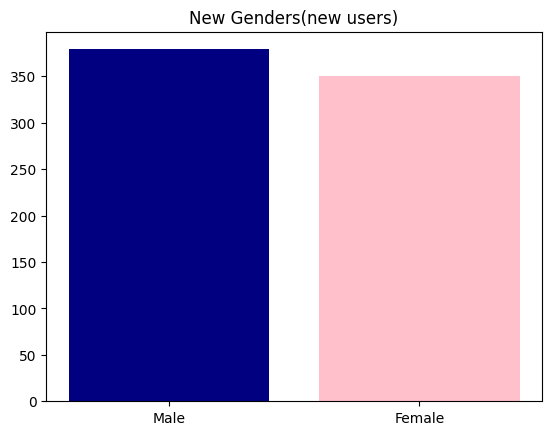

In [160]:
plt.bar(x=new_genders["gender"],height=new_genders["count"],color=["navy", "pink"]) 
plt.title("New Genders(new users)")

# Did the new users came only for a specific type of card?

Text(0, 0.5, 'count')

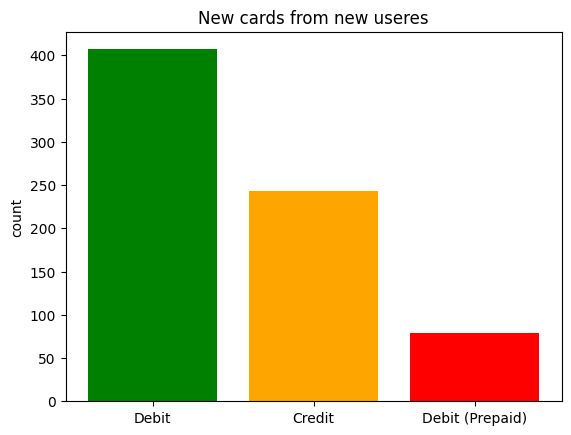

In [161]:
new_cards_from_new_users=actual_new_users_in_2020["card_type"].value_counts().reset_index()
plt.bar(x=new_cards_from_new_users["card_type"],height=new_cards_from_new_users["count"],color=["green", "orange","red"])
plt.title("New cards from new useres")
plt.ylabel("count")

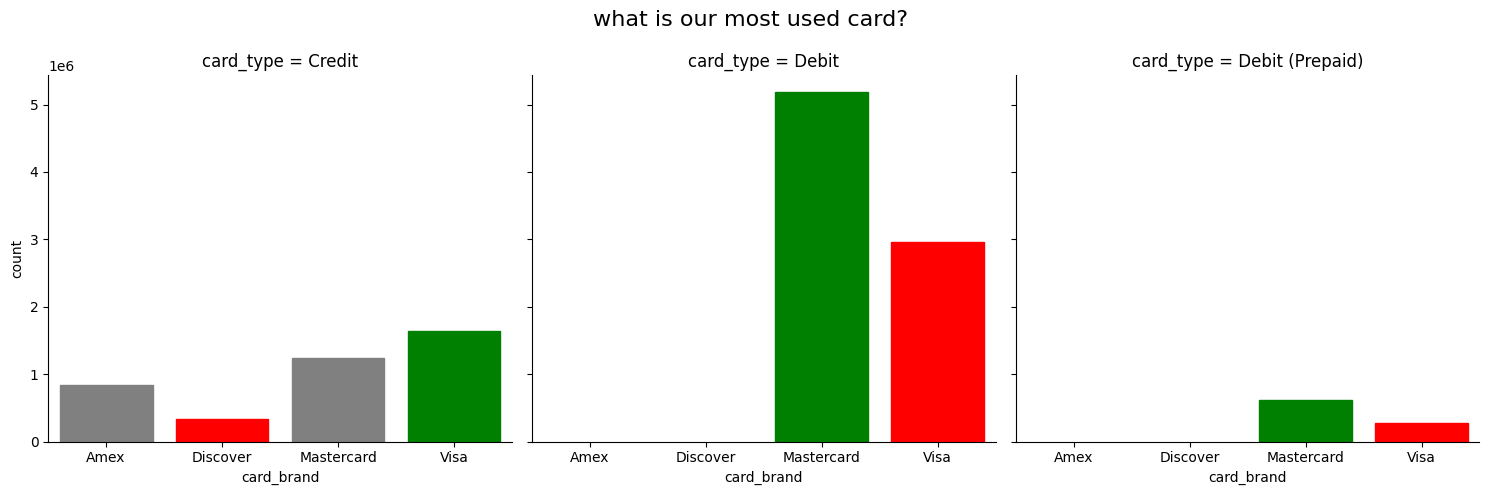

In [162]:
#Cards EDA
custom_colors=["#1f77b4", "#ff7f0e", "#2ca02c", "#d62728"]
popular_cards = sns.catplot(
    data=transactions,  
    x="card_brand",     
    col="card_type",    
    kind="count"         
)
title_map = {
    "Debit": "Debit Cards",
    "Credit": "Credit Cards",
    "Debit (Prepaid)": "Prepaid Cards"
}

for ax in popular_cards.axes.flat:
    card_type = ax.get_title().split(": ")[-1] 
    ax.set_title(title_map.get(card_type, card_type))  

for ax in popular_cards.axes.flat:
    bars = ax.patches
    
    bar_heights = [bar.get_height() for bar in bars]  
    max_height = max(bar_heights)  
    min_height = min(bar_heights) 

    for bar in bars:
        height = bar.get_height()  
        if height == max_height:
            bar.set_color('green')  
        elif height == min_height:
            bar.set_color('red')  
        else:
            bar.set_color('grey') 
        
plt.suptitle("what is our most used card?",fontsize=16)
plt.subplots_adjust(top=0.85)
popular_cards


In [163]:
cards

,id,client_id,card_brand,card_type,card_number,expires,cvv,has_chip,num_cards_issued,credit_limit,acct_open_date,year_pin_last_changed,card_on_dark_web,acct_open_year,acct_open_month,gender
0,0,1362,Amex,Credit,393314135668401,04/2024,866,True,2,33900.00,1991-01,2014,No,1991,1,Male
1,1,550,Mastercard,Credit,5278231764792292,06/2024,396,True,1,11600.00,1994-01,2013,No,1994,1,Male
2,2,556,Mastercard,Debit,5889825928297675,09/2021,422,True,1,19948.00,1995-01,2011,No,1995,1,Male
3,3,1937,Visa,Credit,4289888672554714,04/2020,736,True,2,16400.00,1995-01,2015,No,1995,1,Female
4,4,1981,Mastercard,Debit,5433366978583845,03/2024,530,True,2,19439.00,1997-01,2007,No,1997,1,Male
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6141,6141,715,Mastercard,Debit,5369522792349411,08/2022,597,True,1,36570.00,2019-12,2019,No,2019,12,Female
6142,6142,1236,Mastercard,Debit,5791756986936871,11/2024,196,True,1,12223.00,2019-12,2019,No,2019,12,Female
6143,6143,253,Mastercard,Debit,5482273460029161,07/2024,79,False,1,24690.00,2019-12,2019,No,2019,12,Male
6144,6144,737,Mastercard,Credit,5413710543564908,10/2024,454,True,1,6600.00,2019-12,2019,No,2019,12,Female


In [164]:
transactions.columns

Index(['transaction_id', 'date', 'client_id', 'card_id', 'amount', 'use_chip',
       'merchant_id', 'merchant_city', 'merchant_state', 'zip', 'mcc',
       'errors', 'Merchant', 'Fraud', 'card_on_dark_web', 'card_brand',
       'card_type', 'has_chip', 'year', 'month', 'day', 'gender',
       'transaction_type'],
      dtype='object')

In [165]:
transactions.columns

Index(['transaction_id', 'date', 'client_id', 'card_id', 'amount', 'use_chip',
       'merchant_id', 'merchant_city', 'merchant_state', 'zip', 'mcc',
       'errors', 'Merchant', 'Fraud', 'card_on_dark_web', 'card_brand',
       'card_type', 'has_chip', 'year', 'month', 'day', 'gender',
       'transaction_type'],
      dtype='object')

In [166]:
transactions["transaction_type"]=transactions["transaction_type"].astype("category")


In [167]:
#in to out transactions_per year
#will exclude fraud

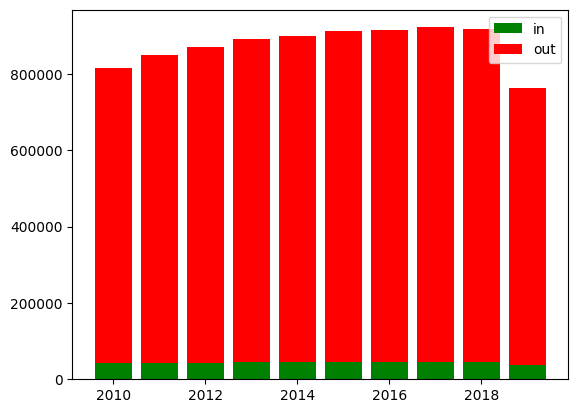

In [168]:
IN_OUT_Per_year=transactions[transactions["Fraud"]==False].groupby(['year', 'transaction_type']).size().reset_index(name='count')
IN_OUT_Per_year
data_wide = IN_OUT_Per_year.pivot(index='year', columns='transaction_type',values="count").reset_index()

plt.bar(data_wide['year'], data_wide['in'], color='green', label='in')
plt.bar(data_wide['year'], data_wide['out'], bottom=data_wide['in'], color='red', label='out')
plt.legend()


In [169]:
IN_OUT_Per_year


,year,transaction_type,count
0,2010,in,42320
1,2010,out,773711
2,2011,in,43468
3,2011,out,806201
4,2012,in,43522
5,2012,out,827119
6,2013,in,44515
7,2013,out,846936
8,2014,in,44156
9,2014,out,855704


In [170]:
data_wide

transaction_type,year,in,out
0,2010,42320,773711
1,2011,43468,806201
2,2012,43522,827119
3,2013,44515,846936
4,2014,44156,855704
5,2015,45024,868171
6,2016,45098,870410
7,2017,45378,876825
8,2018,44824,873458
9,2019,37611,725982


Very small numbers of in tranasctions compared to out

Text(0, 0.5, 'amount spent per year: 100m')

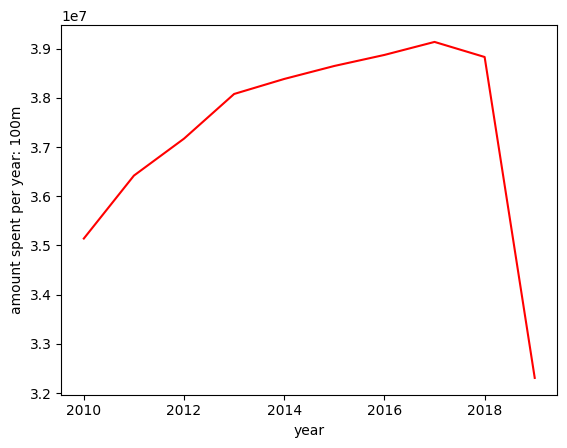

In [171]:
#what about total amount spent per year?
Spent_per_year=pd.pivot_table(data=transactions[transactions["Fraud"]==False],index="year",values="amount",  aggfunc='sum').reset_index()
sns.lineplot(data=Spent_per_year,x="year",y="amount",color="red")
plt.ylabel("amount spent per year: 100m")
#what happend in amounts in 2019?

In [172]:
Spent_per_year

,year,amount
0,2010,35140231.85
1,2011,36419343.43
2,2012,37170492.73
3,2013,38078031.92
4,2014,38383260.14
5,2015,38647200.26
6,2016,38871472.46
7,2017,39135783.45
8,2018,38829316.95
9,2019,32307763.04


In [173]:
Spent_per_month_2018=pd.pivot_table(data=transactions[(transactions["year"]==2018)&(transactions["Fraud"]==False)],index="month",values="amount",  aggfunc='sum').reset_index()
Spent_per_month_2019=pd.pivot_table(data=transactions[(transactions["year"]==2019)&(transactions["Fraud"]==False)],index="month",values="amount",  aggfunc='sum').reset_index()
diff=Spent_per_month_2018["amount"]-Spent_per_month_2019["amount"]

In [174]:
Spent_per_month_2018

,month,amount
0,1,3264986.54
1,2,2984187.61
2,3,3322715.04
3,4,3197778.95
4,5,3263498.66
5,6,3193809.29
6,7,3342525.16
7,8,3343236.97
8,9,3152897.76
9,10,3302039.06


In [175]:
Spent_per_month_2019

,month,amount
0,1,3275960.83
1,2,2962582.88
2,3,3325298.08
3,4,3205884.90
4,5,3284706.48
5,6,3236679.85
6,7,3304102.78
7,8,3264425.80
8,9,3197789.47
9,10,3250331.97


In [176]:
diff

0    -10974.29
1     21604.73
2     -2583.04
3     -8105.95
4    -21207.82
5    -42870.56
6     38422.38
7     78811.17
8    -44891.71
9     51707.09
10         NaN
11         NaN
Name: amount, dtype: float64

In [177]:
#last 2 months tranasctions are not captured in this data.

In [178]:
transactions.info()

<class 'pandas.core.frame.DataFrame'>
Index: 13094522 entries, 0 to 13305914
Data columns (total 23 columns):
 #   Column            Dtype         
---  ------            -----         
 0   transaction_id    int32         
 1   date              datetime64[ns]
 2   client_id         int64         
 3   card_id           int16         
 4   amount            float64       
 5   use_chip          category      
 6   merchant_id       int32         
 7   merchant_city     category      
 8   merchant_state    string        
 9   zip               float64       
 10  mcc               int16         
 11  errors            object        
 12  Merchant          category      
 13  Fraud             boolean       
 14  card_on_dark_web  string        
 15  card_brand        category      
 16  card_type         category      
 17  has_chip          bool          
 18  year              int16         
 19  month             int8          
 20  day               int8          
 21  gender     

In [179]:
#what wwas the most merchant service people spent money on each year??
Top_merchant=transactions[transactions["Fraud"]==False].groupby("Merchant")["amount"].sum().reset_index()

In [180]:
Top_merchants=Top_merchant.sort_values(by="amount",ascending=False)

In [181]:
Top_merchants_merchant=Top_merchants["Merchant"]

In [182]:
Top_merchant=Top_merchant[0:10]
Top_merchant_=Top_merchant.sort_values(by="amount",ascending=True)

In [183]:
transactions["Fraud"].value_counts()

Fraud
False    8760433
True       12763
Name: count, dtype: Int64

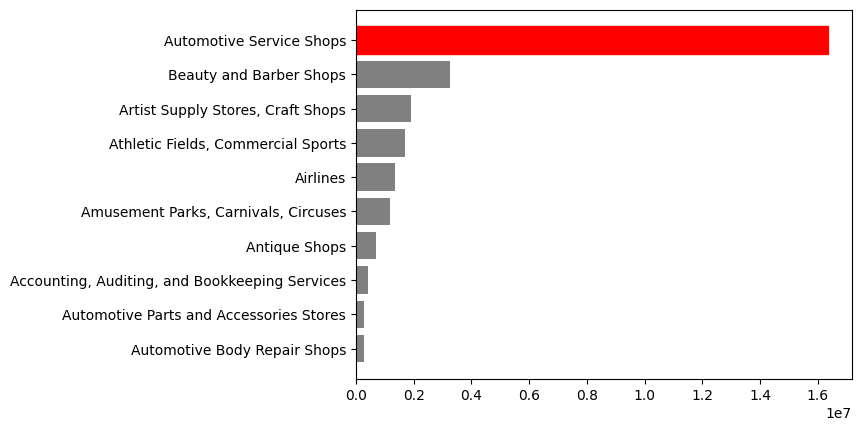

In [184]:
Top_merchants_chart=plt.barh(y=Top_merchant_["Merchant"],width=Top_merchant_["amount"],color="grey")
Top_merchants_chart[-1].set_color('red')

#We can make a contract with insurance cmoppany

In [185]:
#how does it look like tho


In [186]:
card_transactions=transactions[transactions["Fraud"]==False].groupby("card_brand")["amount"].sum()

In [187]:
card_transactions=card_transactions.reset_index()
card_transactions

,card_brand,amount
0,Amex,30641790.66
1,Discover,12017657.93
2,Mastercard,187783903.07
3,Visa,142539544.57


<Axes: xlabel='card_brand', ylabel='amount'>

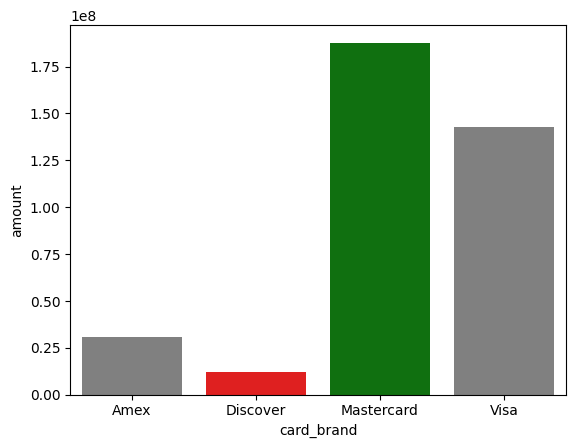

In [188]:
sns.barplot(data=card_transactions,x="card_brand",y="amount",palette={"Mastercard":"green","Discover":"red","Visa":"grey","Amex":"grey"})

In [189]:
#now lets see the errors 
errors["errors"].value_counts()

errors
Insufficient Balance                                     130902
Bad PIN                                                   32119
Technical Glitch                                          26271
Bad Card Number                                            7767
Bad Expiration                                             6161
Bad CVV                                                    6106
Bad Zipcode                                                1126
"Bad PIN,Insufficient Balance"                              293
"Insufficient Balance,Technical Glitch"                     243
"Bad Card Number,Insufficient Balance"                       71
"Bad PIN,Technical Glitch"                                   70
"Bad CVV,Insufficient Balance"                               57
"Bad Expiration,Insufficient Balance"                        47
"Bad Card Number,Bad CVV"                                    38
"Bad Card Number,Bad Expiration"                             33
"Bad Expiration,Bad CVV"         

In [190]:
errors.columns

Index(['transaction_id', 'date', 'client_id', 'card_id', 'amount', 'use_chip',
       'merchant_id', 'merchant_city', 'merchant_state', 'zip', 'mcc',
       'errors', 'Merchant', 'Fraud', 'card_on_dark_web', 'card_brand',
       'card_type', 'has_chip', 'year', 'month', 'day', 'gender',
       'transaction_type'],
      dtype='object')

errors are mostly due to user issue,however we can see alot of tech glitches, maybe there was an outage ?

In [191]:
errors_tech=errors[errors["errors"].isin(["Technical Glitch","Bad PIN,Technical Glitch","Bad Expiration,Technical Glitch"])]

In [192]:
errors_per_year=errors_tech.groupby(["year","month"])["errors"].agg(["count"]).reset_index()

In [193]:
errors_count_pivot = errors_per_year.pivot(index="year", columns="month", values="count").sum(axis=1)


In [194]:
errors_count_pivot.mean(axis=0)

np.float64(2627.1)

#there is an avearge of 2627.1 tech issues per year

In [195]:
#Fraud EDA

In [196]:
Fraud_transaction_R=transactions[transactions["Fraud"]==True]
Fraud_transaction_Failed=errors[errors["Fraud"]==True]

I noticed that some  refunds transactions are fraud transactions

In [197]:
Fraud_transaction_R[Fraud_transaction_R["card_id"]==3441]

,transaction_id,date,client_id,card_id,amount,use_chip,merchant_id,merchant_city,merchant_state,zip,...,Fraud,card_on_dark_web,card_brand,card_type,has_chip,year,month,day,gender,transaction_type
13255557,23699820,2019-10-18 16:13:00,345,3441,107.58,Chip Transaction,66052,Rome,Italy,NaN,...,True,No,Visa,Credit,True,2019,10,18,Male,out
13257989,23702805,2019-10-19 10:38:00,345,3441,79.22,Chip Transaction,48919,Rome,Italy,NaN,...,True,No,Visa,Credit,True,2019,10,19,Male,out
13282707,23733174,2019-10-25 18:53:00,345,3441,210.00,Chip Transaction,49637,Rome,Italy,NaN,...,True,No,Visa,Credit,True,2019,10,25,Male,out
13289605,23741689,2019-10-27 14:49:00,345,3441,-210.00,Chip Transaction,49637,Rome,Italy,NaN,...,True,No,Visa,Credit,True,2019,10,27,Male,in


Merchant city is rome, refunded transaction here got refunded instantly

In [198]:
#how many got refunded?
Fraud_out_2_refunded=Fraud_transaction_R.groupby("transaction_type")["amount"].agg(["sum","count"]).reset_index()
Fraud_out_2_refunded=Fraud_out_2_refunded.replace({"in":"refunded","out":"not refunded"})
Fraud_out_2_refunded

,transaction_type,sum,count
0,refunded,-134226.00,471
1,not refunded,1552057.79,12292


([<matplotlib.patches.Wedge at 0x283b81c23c0>,
 [Text(1.0926156508696483, 0.12724401547693678, 'refunded'),
  Text(-1.092615654914291, -0.1272439807464989, 'not refunded')],
 [Text(0.5959721732016263, 0.0694058266237837, '3.7%'),
  Text(-0.595972175407795, -0.06940580767990849, '96.3%')])

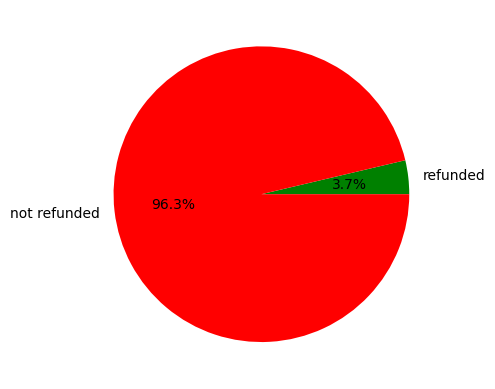

In [199]:
plt.pie(Fraud_out_2_refunded["count"],labels=Fraud_out_2_refunded["transaction_type"],colors=["green","red"],autopct='%1.1f%%')

In [200]:
#any refund here?
Fraud_transaction_Failed["transaction_type"].value_counts()

transaction_type
out    550
in      19
Name: count, dtype: int64

this is weird

In [201]:
Fraud_transaction_Failed[(errors["Fraud"] == True) & (Fraud_transaction_Failed["transaction_type"] == "in")][["errors","amount"]]


,errors,amount
174950,Bad CVV,-280.00
526944,Bad CVV,-297.00
658539,Bad CVV,-275.00
691492,Bad Card Number,-368.00
1077921,Bad CVV,-235.00
1227117,Bad Card Number,-369.00
2616453,Bad CVV,-396.00
2743917,Bad CVV,-229.00
2784255,Technical Glitch,-137.00
4625762,Bad CVV,-183.00


In [202]:
Fraud_transaction_Failed[Fraud_transaction_Failed["amount"]==-280]

,transaction_id,date,client_id,card_id,amount,use_chip,merchant_id,merchant_city,merchant_state,zip,...,Fraud,card_on_dark_web,card_brand,card_type,has_chip,year,month,day,gender,transaction_type
174950,7684298,2010-02-23 04:21:00,1479,1139,-280.00,Online Transaction,52923,ONLINE,<NA>,NaN,...,True,No,Mastercard,Credit,True,2010,2,23,Male,in


In [203]:
Fraud_transaction_R[Fraud_transaction_R["amount"]==280]

,transaction_id,date,client_id,card_id,amount,use_chip,merchant_id,merchant_city,merchant_state,zip,...,Fraud,card_on_dark_web,card_brand,card_type,has_chip,year,month,day,gender,transaction_type


#the amount cannot be found anywhere, this might be caused by a refund to expired card, or a deposit ? We dont know much about this data.

In [204]:
Fraud_transaction_Failed[Fraud_transaction_Failed["amount"]==-297.00]

,transaction_id,date,client_id,card_id,amount,use_chip,merchant_id,merchant_city,merchant_state,zip,...,Fraud,card_on_dark_web,card_brand,card_type,has_chip,year,month,day,gender,transaction_type
526944,8106189,2010-06-08 05:43:00,1779,1214,-297.00,Online Transaction,59474,ONLINE,<NA>,NaN,...,True,No,Mastercard,Debit,True,2010,6,8,Male,in


In [205]:
Fraud_transaction_R[Fraud_transaction_R["amount"]==297.00]

,transaction_id,date,client_id,card_id,amount,use_chip,merchant_id,merchant_city,merchant_state,zip,...,Fraud,card_on_dark_web,card_brand,card_type,has_chip,year,month,day,gender,transaction_type
520927,8098974,2010-06-06 10:43:00,1779,1214,297.00,Online Transaction,59474,ONLINE,<NA>,NaN,...,True,No,Mastercard,Debit,True,2010,6,6,Male,out


#however this transaction we can see, which might indicate that the bank tried to refund the amount to the same card, which might got frozen at the time

In [206]:
Fraud_transaction_R[Fraud_transaction_R["amount"]==396.00]

,transaction_id,date,client_id,card_id,amount,use_chip,merchant_id,merchant_city,merchant_state,zip,...,Fraud,card_on_dark_web,card_brand,card_type,has_chip,year,month,day,gender,transaction_type
2606919,10629033,2012-01-21 19:50:00,1268,2658,396.00,Online Transaction,49637,ONLINE,<NA>,NaN,...,True,No,Visa,Credit,True,2012,1,21,Male,out
4644856,13113674,2013-08-03 08:17:00,1710,1182,396.00,Swipe Transaction,87685,Strasburg,OH,44680.00,...,True,No,Mastercard,Debit,True,2013,8,3,Female,out
11937990,22069328,2018-11-07 13:07:00,1098,4626,396.00,Chip Transaction,32070,Rome,Italy,NaN,...,True,No,Visa,Debit,True,2018,11,7,Male,out


In [207]:
Fraud_transaction_Failed[Fraud_transaction_Failed["amount"]==-396.00]

,transaction_id,date,client_id,card_id,amount,use_chip,merchant_id,merchant_city,merchant_state,zip,...,Fraud,card_on_dark_web,card_brand,card_type,has_chip,year,month,day,gender,transaction_type
2616453,10640594,2012-01-24 14:42:00,1268,2658,-396.00,Online Transaction,49637,ONLINE,<NA>,NaN,...,True,No,Visa,Credit,True,2012,1,24,Male,in


Based on previous example, we can confirm this, we can also notice that if they refudn is guranteed ,it gets issued within 3/2 days, we can pull more data/information about how the policy works, but, indivisual cases might take along time that is better used on getting general insights.

In [208]:
transactions["Fraud"].value_counts()


Fraud
False    8760433
True       12763
Name: count, dtype: Int64

In [209]:
errors["Fraud"].value_counts()

Fraud
False    141198
True        569
Name: count, dtype: Int64

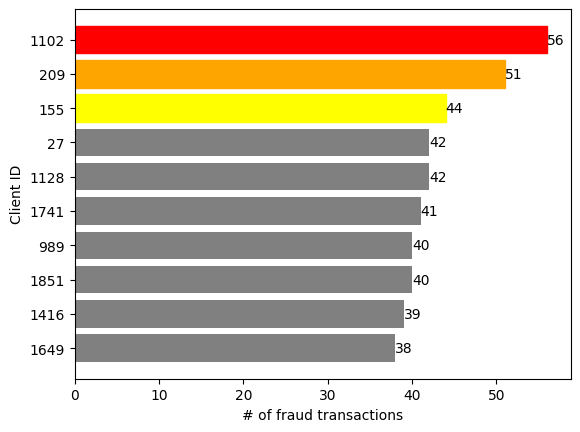

In [210]:
#is there any users whom most transactions are confirmed fraud?

User_fraud_tranasctiosn=transactions.groupby("client_id")["Fraud"].sum().reset_index()
User_fraud_tranasctiosn=User_fraud_tranasctiosn.sort_values(by="Fraud",ascending=False)
User_fraud_tranasctiosn_top_10=User_fraud_tranasctiosn[0:10]
User_fraud_tranasctiosn_top_10=User_fraud_tranasctiosn_top_10.sort_values(by="Fraud",ascending=True)
User_fraud_tranasctiosn_top_10["client_id"]=User_fraud_tranasctiosn_top_10["client_id"].astype(str)

bars=plt.barh(
    y=User_fraud_tranasctiosn_top_10["client_id"],   
    width=User_fraud_tranasctiosn_top_10["Fraud"],color="grey"               
)
plt.ylabel("Client ID")
plt.xlabel("# of fraud transactions")
plt.bar_label(bars, fmt='%d')  
bars[-1].set_color('red')
bars[-2].set_color('orange')
bars[-3].set_color('yellow')






In [211]:
transactions.isnull().sum()

transaction_id             0
date                       0
client_id                  0
card_id                    0
amount                     0
use_chip                   0
merchant_id                0
merchant_city              0
merchant_state       1528138
zip                  1615934
mcc                        0
errors              13094522
Merchant                   0
Fraud                4321326
card_on_dark_web           0
card_brand                 0
card_type                  0
has_chip                   0
year                       0
month                      0
day                        0
gender                     0
transaction_type           0
dtype: int64

In [212]:
# what about the fraud transactions itself, is there is a mscc that is linked with most frauds ?
group_fraud2merchant=transactions.groupby("Merchant")["Fraud"].sum().reset_index()
group_fraud2merchant=group_fraud2merchant.sort_values(by="Fraud",ascending=False)
group_fraud2merchant_top_10=group_fraud2merchant[0:10]
group_fraud2merchant_top_10=group_fraud2merchant_top_10.sort_values(by="Fraud",ascending=True)

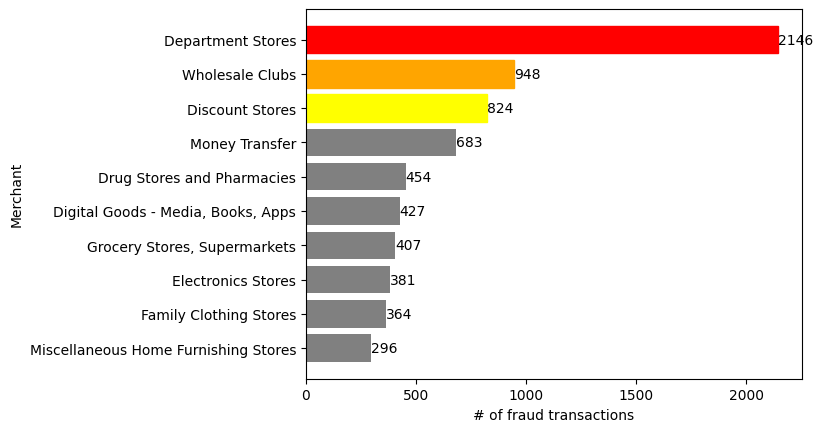

In [213]:
group_fraud2merchant_top_10_chart=plt.barh(
    y=group_fraud2merchant_top_10["Merchant"],   
    width=group_fraud2merchant_top_10["Fraud"],color="grey"               
)
plt.ylabel("Merchant")
plt.xlabel("# of fraud transactions")
plt.bar_label(group_fraud2merchant_top_10_chart, fmt='%d')  
group_fraud2merchant_top_10_chart[-1].set_color('#FF0000')
group_fraud2merchant_top_10_chart[-2].set_color('orange')
group_fraud2merchant_top_10_chart[-3].set_color('yellow')


In [214]:
gc.collect()

5632

In [215]:
Fraud_transaction_R

,transaction_id,date,client_id,card_id,amount,use_chip,merchant_id,merchant_city,merchant_state,zip,...,Fraud,card_on_dark_web,card_brand,card_type,has_chip,year,month,day,gender,transaction_type
3459,7479444,2010-01-01 23:56:00,126,5497,0.19,Online Transaction,90999,ONLINE,<NA>,NaN,...,True,No,Mastercard,Debit,True,2010,1,1,Male,out
9526,7486725,2010-01-03 20:58:00,126,5497,339.00,Online Transaction,3558,ONLINE,<NA>,NaN,...,True,No,Mastercard,Debit,True,2010,1,3,Male,out
12989,7490901,2010-01-04 23:30:00,720,4136,4.45,Online Transaction,24504,ONLINE,<NA>,NaN,...,True,No,Mastercard,Debit,True,2010,1,4,Female,out
13000,7490914,2010-01-04 23:48:00,720,4136,7.19,Online Transaction,38602,ONLINE,<NA>,NaN,...,True,No,Mastercard,Debit,True,2010,1,4,Female,out
13081,7491008,2010-01-05 02:34:00,1644,3444,8.76,Online Transaction,21776,ONLINE,<NA>,NaN,...,True,No,Visa,Credit,True,2010,1,5,Male,out
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13285478,23736635,2019-10-26 13:44:00,1575,5582,128.30,Chip Transaction,32070,Rome,Italy,NaN,...,True,No,Visa,Debit,True,2019,10,26,Female,out
13285493,23736653,2019-10-26 13:50:00,451,5810,94.49,Chip Transaction,41375,Rome,Italy,NaN,...,True,No,Mastercard,Debit,True,2019,10,26,Male,out
13285600,23736786,2019-10-26 14:16:00,797,2839,120.30,Chip Transaction,7777,Rome,Italy,NaN,...,True,No,Mastercard,Debit,True,2019,10,26,Female,out
13285842,23737098,2019-10-26 15:15:00,1854,3570,112.44,Chip Transaction,83018,Rome,Italy,NaN,...,True,No,Mastercard,Credit,True,2019,10,26,Male,out


In [216]:
#any specific merchant id? for both suc , and non suc
group_fraud2merchant_id=transactions[transactions["Fraud"]==True].groupby("merchant_id")["Fraud"].sum().reset_index()


In [217]:
#is there is any city that is connected to the most fraud transactions?
group_fraud2merchant_id.sort_values(by="Fraud",ascending=False)

,merchant_id,Fraud
655,60569,727
293,27092,683
525,48919,316
1058,99370,284
356,32858,275
...,...,...
1043,97526,1
1044,97537,1
1045,97721,1
1046,97857,1


In [218]:
group_fraud2merchant_iderrors=errors[errors["Fraud"]==True].groupby("merchant_id")["Fraud"].sum().reset_index()


In [219]:
group_fraud2merchant_iderrors

,merchant_id,Fraud
0,569,1
1,950,3
2,2156,2
3,2297,2
4,4281,1
...,...,...
166,94212,1
167,94625,1
168,94963,1
169,97747,1


In [220]:
group_fraud2merchant_iderrors
group_fraud2merchant_iderrors.sort_values(by="Fraud",ascending=False)

,merchant_id,Fraud
42,27092,42
101,60569,37
170,99370,18
80,48919,16
124,76639,16
...,...,...
163,90915,1
166,94212,1
167,94625,1
168,94963,1


In [221]:
group_fraud2merchant_iderrors.rename(columns={"Fraud":"right fraud"},inplace=True)

In [222]:
group_fraud2merchant_iderrors["right fraud"].value_counts()

right fraud
1     86
2     22
4     15
3     13
5     12
7      5
9      4
8      3
6      3
16     2
14     1
42     1
11     1
37     1
13     1
18     1
Name: count, dtype: Int64

In [223]:
Group_fraud_merchantid=pd.merge(group_fraud2merchant_id,group_fraud2merchant_iderrors,on="merchant_id",how="outer")

In [224]:
Group_fraud_merchantid=Group_fraud_merchantid.fillna(0)

In [225]:
Group_fraud_merchantid["total_fraud"]=Group_fraud_merchantid["Fraud"]+Group_fraud_merchantid["right fraud"]

In [226]:
Group_fraud_merchantid.sort_values(by="total_fraud",ascending=False)

,merchant_id,Fraud,right fraud,total_fraud
673,60569,727,37,764
298,27092,683,42,725
537,48919,316,16,332
1084,99370,284,18,302
361,32858,275,14,289
...,...,...,...,...
1069,97537,1,0,1
1070,97721,1,0,1
1071,97747,0,1,1
1072,97857,1,0,1


In [227]:
top_merchants=Group_fraud_merchantid.sort_values(by="total_fraud",ascending=False)[0:20]

In [228]:
top_merchants=Group_fraud_merchantid.sort_values(by="total_fraud",ascending=False)[0:20]


In [229]:
top_merchants

,merchant_id,Fraud,right fraud,total_fraud
673,60569,727,37,764
298,27092,683,42,725
537,48919,316,16,332
1084,99370,284,18,302
361,32858,275,14,289
845,76639,270,16,286
926,83018,223,13,236
750,67570,217,8,225
352,31893,205,9,214
374,34490,186,11,197


In [230]:
##what about merchant city?
fraud_ctites=transactions[transactions["Fraud"]==True].groupby("merchant_city")["Fraud"].sum().reset_index()


In [231]:
fraud_ctites.sort_values(by="Fraud",ascending=False)

,merchant_city,Fraud
8040,ONLINE,8388
9570,Rome,2939
8982,Port au Prince,240
10779,Strasburg,202
10831,Sugarcreek,22
...,...,...
12468,Zavalla,0
12467,Zapata,0
12466,Zanesville,0
12465,Zanesfield,0


In [235]:
#total fraud amount?
All_fraud=transactions_restored[transactions_restored["Fraud"]==True]

In [ ]:
All_fraud["amount"].sum()


np.float64(1469648.78)

In [236]:
#what cards is more likely to be breached?
groupe_fraued_cards=All_fraud.groupby("card_brand")["Fraud"].size().reset_index()

In [239]:
groupe_fraued_cards.to_csv("frauded.csv")

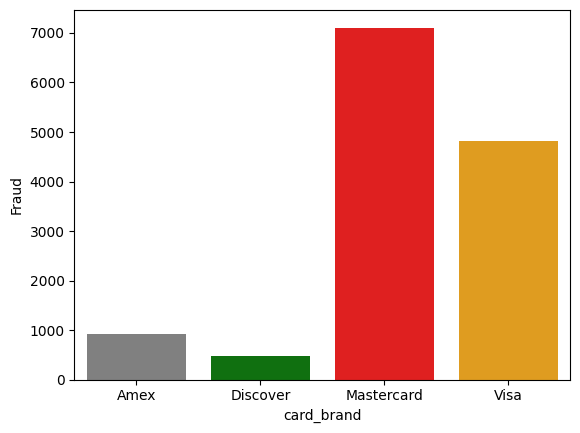

In [238]:
Frauded_cards = sns.barplot(
    data=groupe_fraued_cards,
    x="card_brand",
    y="Fraud",
    palette=["grey", "green", "red", "orange"])

In [ ]:
#to export


In [233]:
transactions_restored = pd.concat([transactions, errors])


In [ ]:
transactions_restored.to_csv("transactions_excel.csv",index=False)

In [ ]:
users.to_excel("users1.xlsx", index=False)


In [ ]:
transactions_restored

In [ ]:
cards.to_excel("cards.xlsx", index=False)


In [243]:
errors.to_csv("All_errors.csv")

In [241]:
errors_group=errors.groupby("card_brand").size()

In [242]:
errors_group

card_brand
Amex           13245
Discover        4998
Mastercard    115280
Visa           77870
dtype: int64